# `Supply Chain And Inventory Management`

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime 
from scipy.stats import stats
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

In [2]:
inventory=pd.read_csv('/Users/adityabisht/Downloads/Inventory_Stock_Data.csv')
inventory

order-now  product id                                product name  \
0       green          19     Nike Men's Fingertrap Max Training Shoe   
1      orange          24                 Elevation Training Mask 2.0   
2       green          35     adidas Brazuca 2014 Official Match Ball   
3       green          37       adidas Kids' F5 Messi FG Soccer Cleat   
4      orange          44  adidas Men's F10 Messi TRX FG Soccer Cleat   
..        ...         ...                                         ...   
113     green        1359                          Adult dog supplies   
114    orange        1360                                 Smart watch   
115     green        1361                                        Toys   
116    orange        1362                        Fighting video games   
117     green        1363                              Summer dresses   

     avg lead time  avg order qty  current stock  max lead time  \
0               10              1             69             30   
1               10              3            175             30   
2               10              1             65             30   
3               10              3            328             30   
4               10              3            175             30   
..             ...            ...            ...            ...   
113             10              1             69             30   
114             10              1             35             30   
115             10              1             61             30   
116             10              1             35             30   
117             10              1             63             30   

     max order qty  mod  reorder point  safety stock  
0                1    1             35            25  
1                5    0            175           144  
2                1    1             35            25  
3                5    1            175           146  
4                5    0            175           145  
..             ...  ...            ...           ...  
113              1    1             35            25  
114              1    0             35            25  
115              1    1             35            25  
116              1    0             35            25  
117              1    1             35            25  

[118 rows x 11 columns]

In [3]:
sales_shipment = pd.read_csv('/Users/adityabisht/Downloads/Sales_Shipment_Data.csv',encoding='latin-1')
sales_shipment

Product Category Id     Category Name                           Class  \
0                        24   Women's Apparel  Moderate Value-Moderate Number   
1                        24   Women's Apparel  Moderate Value-Moderate Number   
2                        24   Women's Apparel  Moderate Value-Moderate Number   
3                        24   Women's Apparel  Moderate Value-Moderate Number   
4                        24   Women's Apparel  Moderate Value-Moderate Number   
...                     ...               ...                             ...   
180514                   17            Cleats         High Value-Small Number   
180515                   17            Cleats         High Value-Small Number   
180516                    9  Cardio Equipment         High Value-Small Number   
180517                   17            Cleats         High Value-Small Number   
180518                   17            Cleats         High Value-Small Number   

          Customer City Customer Country Customer Fname  Customer Id  \
0               Roswell          EE. UU.           Jean         5673   
1           Los Angeles          EE. UU.           Rose         9723   
2                Harvey          EE. UU.         Joshua         9511   
3              Elmhurst          EE. UU.           Mary         3326   
4       North Las Vegas          EE. UU.       Samantha          907   
...                 ...              ...            ...          ...   
180514        Escondido          EE. UU.        Charles         9615   
180515          Seattle          EE. UU.        Richard         1971   
180516          Anaheim          EE. UU.           Mary         7663   
180517        San Diego          EE. UU.           Mary          415   
180518       Sacramento          EE. UU.           Mary         7141   

       Customer Lname Customer Segment Customer State  ...  \
0                Dunn        Corporate             NM  ...   
1               White        Corporate             CA  ...   
2               Brady        Corporate             IL  ...   
3               Smith        Corporate             IL  ...   
4               Kline        Corporate             NV  ...   
...               ...              ...            ...  ...   
180514          Smith        Corporate             CA  ...   
180515         Stokes        Corporate             WA  ...   
180516          Smith        Corporate             CA  ...   
180517          Allen        Corporate             CA  ...   
180518        Jackson        Corporate             CA  ...   

       Order Item Discount Rate  Order Item Id Order Item Product Price  \
0                          0.15         134920                50.000000   
1                          0.16           9722                50.000000   
2                          0.06         129954                50.000000   
3                          0.05           2929                50.000000   
4                          0.05         140056                50.000000   
...                         ...            ...                      ...   
180514                     0.16         124746                59.990002   
180515                     0.17          73577                59.990002   
180516                     0.25          60910                99.989998   
180517                     0.13         114288                59.990002   
180518                     0.17          60174                59.990002   

        Order Item Profit Ratio Order Item Quantity Order Item Total  \
0                          0.11                   2        85.000000   
1                          0.11                   2        84.000000   
2                          0.33                   2        94.500000   
3                          0.29                   2        95.000000   
4                          0.50                   2        95.000000   
...                         ...                 ...              ...   
180514              

## A. DATA AUDIT


### 1. Number of rows & Number of columns

In [4]:
print('No of rows and columns in inventory data :',inventory.shape)

No of rows and columns in inventory data : (118, 11)


In [5]:
print('No.of rows and columns in sales shipment data :',sales_shipment.shape)

No.of rows and columns in sales shipment data : (180519, 46)


### 2. Number of numerical & categorical columns

In [6]:
print('Number of Numerical columns in inventory data :',inventory.select_dtypes('number').shape[1])
print('Number of Categorical columns in inventory data :',inventory.select_dtypes('O').shape[1])

Number of Numerical columns in inventory data : 9
Number of Categorical columns in inventory data : 2


In [7]:
print('Number of Numerical columns in sales shipment data :',sales_shipment.select_dtypes('number').shape[1])

print('Number of Categorical columns in sales shipment data :',sales_shipment.select_dtypes('O').shape[1])

Number of Numerical columns in sales shipment data : 24
Number of Categorical columns in sales shipment data : 22


### 3. Any other observations from the data in terms of cleaning, preparation required?

In [8]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order-now      118 non-null    object
 1   product id     118 non-null    int64 
 2   product name   118 non-null    object
 3   avg lead time  118 non-null    int64 
 4   avg order qty  118 non-null    int64 
 5   current stock  118 non-null    int64 
 6   max lead time  118 non-null    int64 
 7   max order qty  118 non-null    int64 
 8   mod            118 non-null    int64 
 9   reorder point  118 non-null    int64 
 10  safety stock   118 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 10.3+ KB


#####  The inventory stock data seems to be cleaned and requires no extra preperation


In [9]:
sales_shipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product Category Id            180519 non-null  int64  
 1   Category Name                  180519 non-null  object 
 2   Class                          180519 non-null  object 
 3   Customer City                  180519 non-null  object 
 4   Customer Country               180519 non-null  object 
 5   Customer Fname                 180519 non-null  object 
 6   Customer Id                    180519 non-null  int64  
 7   Customer Lname                 180511 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer Street                180519 non-null  object 
 11  Customer Zipcode               180516 non-null  float64
 12  Delivery Status               

In [10]:
sales_shipment.isna().sum()

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

##### There are 8 missing values in Customer Lname and 3 missing values in Customer zipcode

### 4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)

### `UNIVARIATE ANALYSIS`

#### For NUMERICAL COLUMNS.

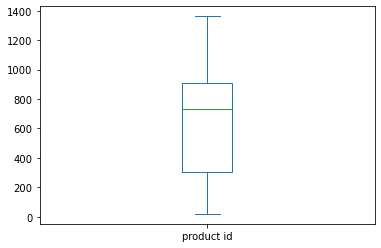

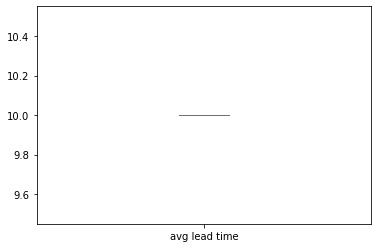

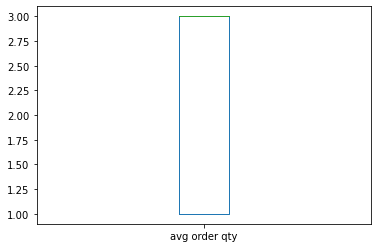

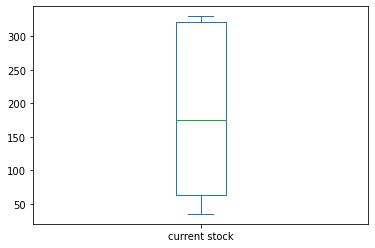

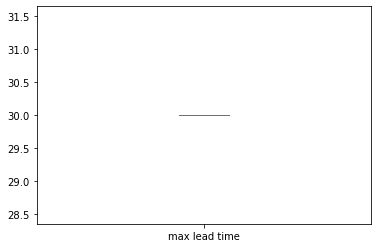

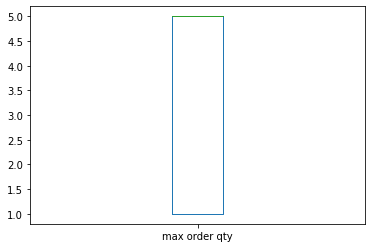

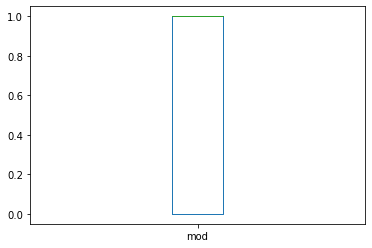

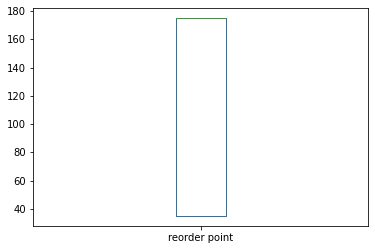

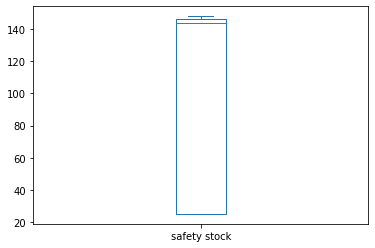

In [11]:
## INVENTORY.
for a in inventory.select_dtypes('number'):
    inventory[a].plot(kind='box')
    plt.show()

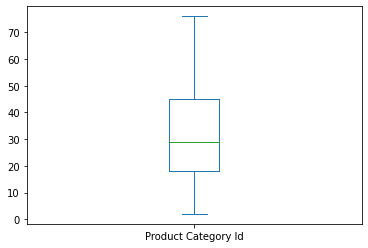

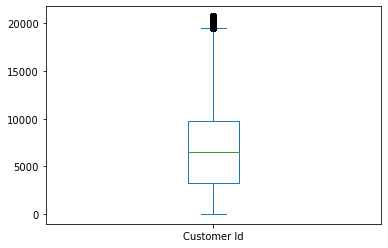

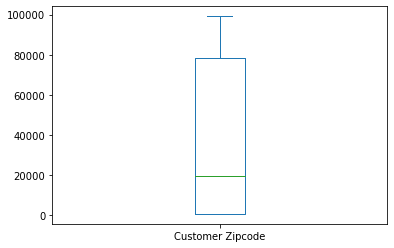

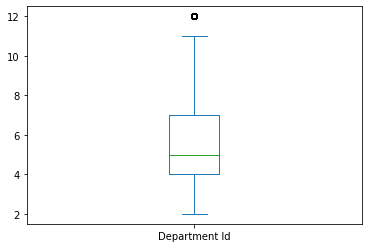

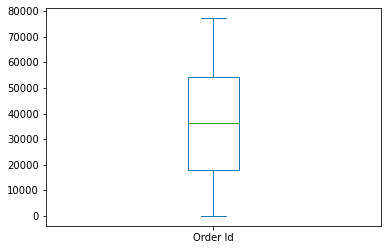

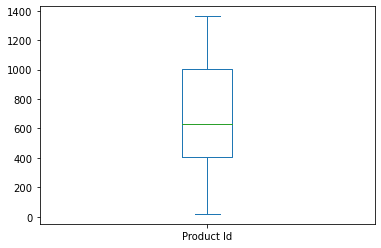

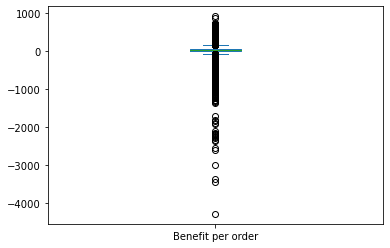

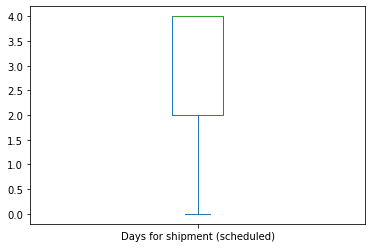

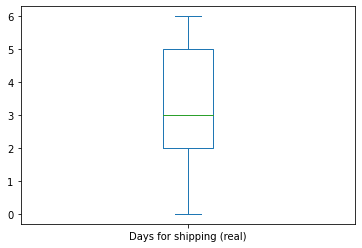

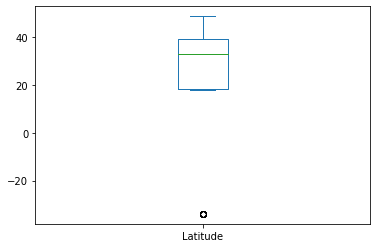

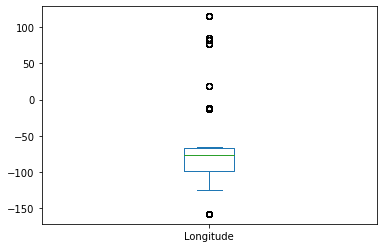

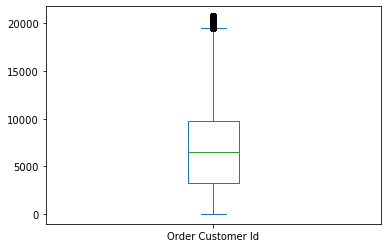

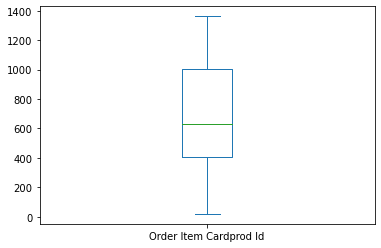

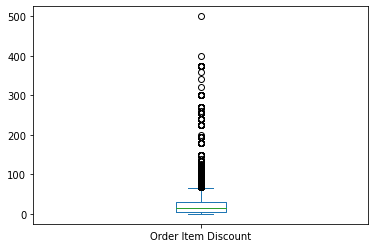

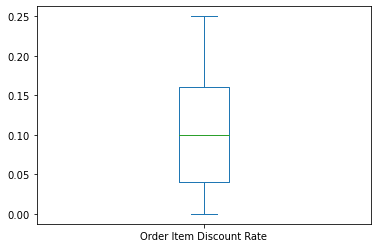

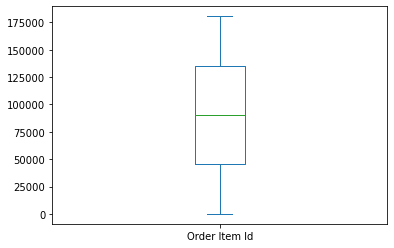

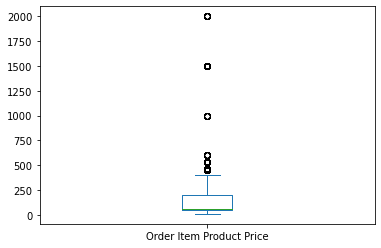

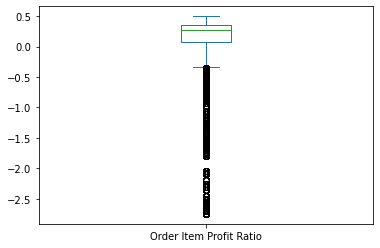

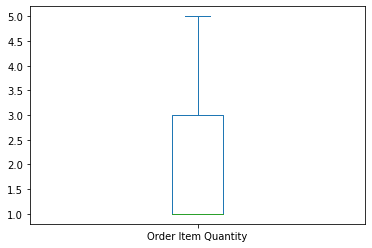

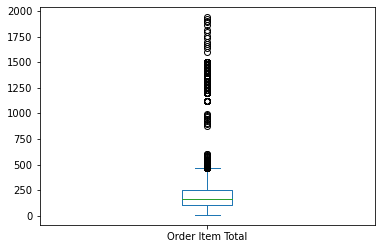

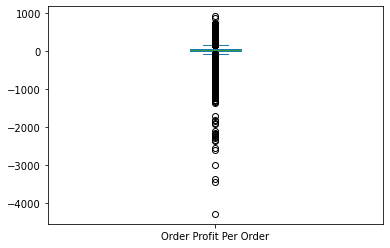

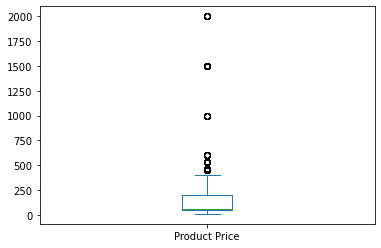

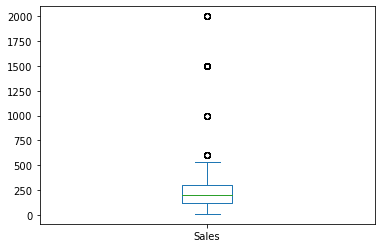

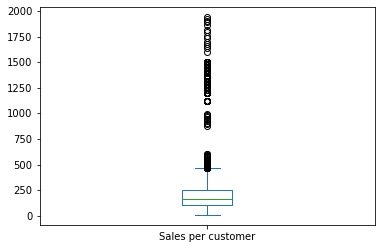

In [12]:
## SALES SHIPMENT.
for x in sales_shipment.select_dtypes('number'):
    sales_shipment[x].plot(kind='box')
    plt.show()

#### For CATEGORICAL COLUMNS

In [13]:
# INVENTORY .
cat_inv = inventory.select_dtypes('O')
cat_inv

order-now                                product name
0       green     Nike Men's Fingertrap Max Training Shoe
1      orange                 Elevation Training Mask 2.0
2       green     adidas Brazuca 2014 Official Match Ball
3       green       adidas Kids' F5 Messi FG Soccer Cleat
4      orange  adidas Men's F10 Messi TRX FG Soccer Cleat
..        ...                                         ...
113     green                          Adult dog supplies
114    orange                                 Smart watch
115     green                                        Toys
116    orange                        Fighting video games
117     green                              Summer dresses

[118 rows x 2 columns]

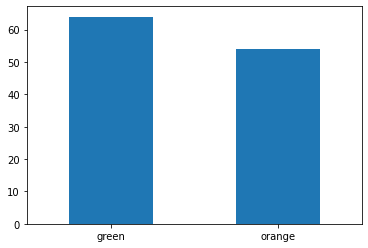

In [14]:
cat_inv['order-now'].value_counts().plot(kind='bar',rot=0)
plt.show()

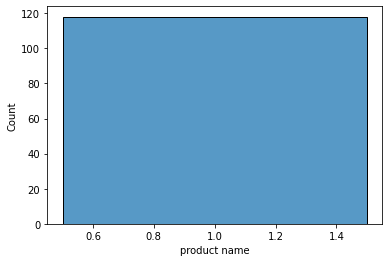

In [15]:
sns.histplot(cat_inv['product name'].value_counts())
plt.show()

In [16]:
# SALES SHIPMENT.
categorical_columns_sales = sales_shipment.select_dtypes('O').columns

In [17]:
categorical_columns_sales

Index(['Category Name', 'Class', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Lname', 'Customer Segment',
       'Customer State', 'Customer Street', 'Delivery Status',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'order date (DateOrders)', 'Order Region', 'Order State',
       'Order Status', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode', 'Type'],
      dtype='object')

In [18]:
categorical_columns_sales = categorical_columns_sales.difference([ 'Customer City', 
       'Customer Fname', 'Customer Lname', 'order date (DateOrders)','Category Name'
       'Customer State', 'Customer Street', 'Order City','Order State','Product Name',
       'Department Name', 'Market', 'Order Country','shipping date (DateOrders)','Category Name','Type'])
categorical_columns_sales

Index(['Class', 'Customer Country', 'Customer Segment', 'Customer State',
       'Delivery Status', 'Order Region', 'Order Status', 'Shipping Mode'],
      dtype='object')

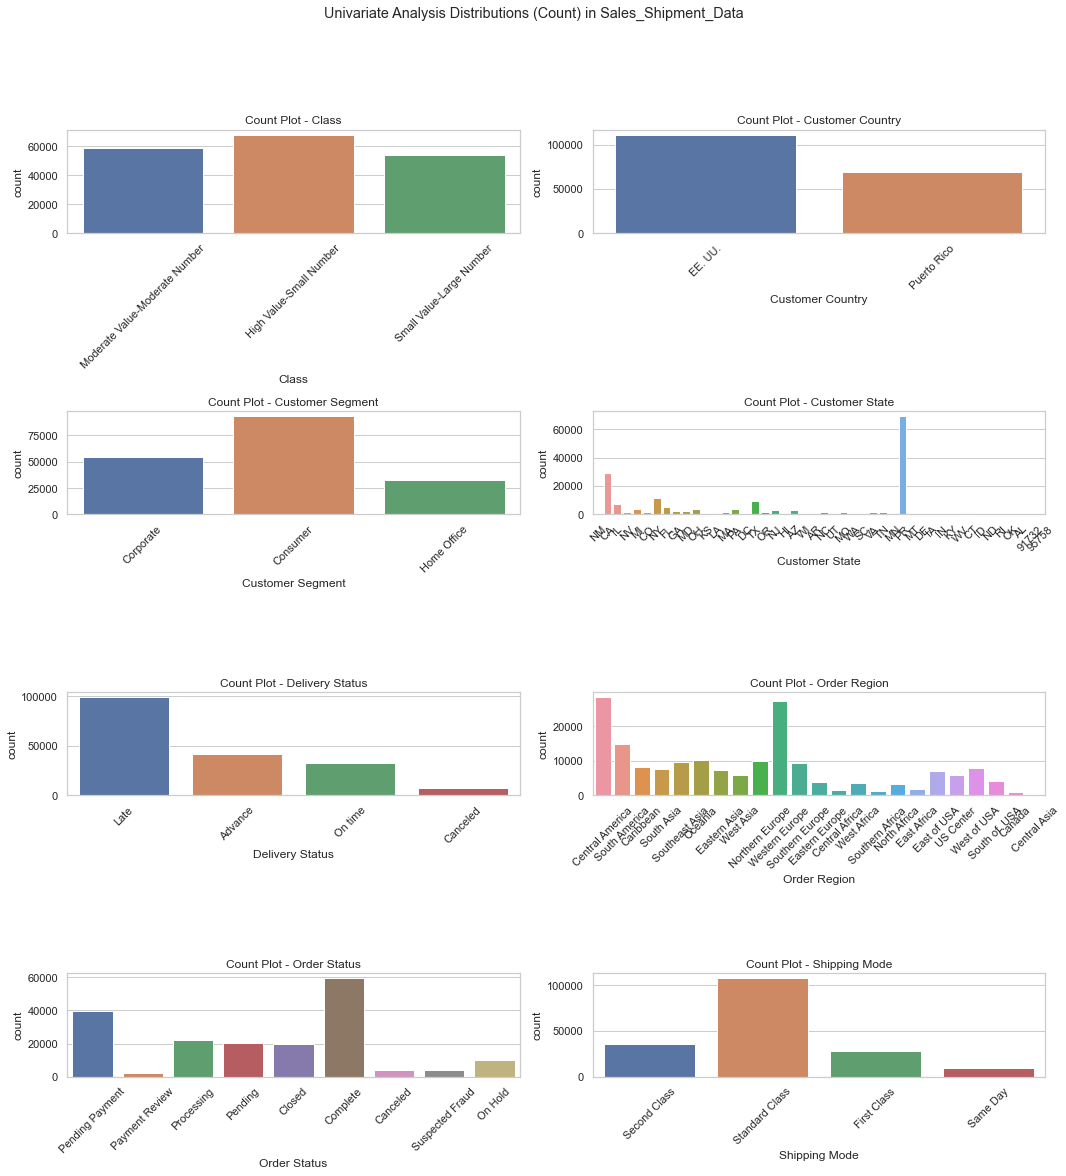

In [19]:
sns.set(style="whitegrid")

# Set up subplots for Sales_Shipment_Data
n_cols = 2  # Number of columns in each row
n_rows = (len(categorical_columns_sales) + n_cols - 1) // n_cols  # Calculate the number of rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
fig.suptitle('Univariate Analysis Distributions (Count) in Sales_Shipment_Data', y=1.02)

# Plot count plots for each categorical variable in Sales_Shipment_Data
for i, column in enumerate(categorical_columns_sales):
    ax = axes[i // n_cols, i % n_cols]
    sns.countplot(x=sales_shipment[column], ax=ax)
    ax.set_title(f'Count Plot - {column}')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### `Bi-VARIATE ANALYSIS` 

### SALES SHIPMENT DATA

In [20]:
sales_shipment.select_dtypes('number').corr()

Product Category Id  Customer Id  \
Product Category Id                       1.000000     0.274633   
Customer Id                               0.274633     1.000000   
Customer Zipcode                          0.002898     0.002022   
Department Id                             0.888835     0.136897   
Order Id                                  0.198496     0.204821   
Product Id                                0.991092     0.228039   
Benefit per order                         0.031889     0.009354   
Days for shipment (scheduled)            -0.000367     0.000899   
Days for shipping (real)                 -0.000348     0.003432   
Latitude                                  0.002195     0.002335   
Longitude                                -0.002320    -0.005146   
Order Customer Id                         0.274633     1.000000   
Order Item Cardprod Id                    0.991092     0.228039   
Order Item Discount                       0.140180     0.038490   
Order Item Discount Rate                  0.000572     0.001712   
Order Item Id                             0.186796     0.191814   
Order Item Product Price                  0.461059     0.111118   
Order Item Profit Ratio                  -0.001614    -0.000337   
Order Item Quantity                      -0.302408    -0.091328   
Order Item Total                          0.225201     0.060181   
Order Profit Per Order                    0.031889     0.009354   
Product Price                             0.461059     0.111118   
Sales                                     0.227483     0.060961   
Sales per customer                        0.225201     0.060181   

                               Customer Zipcode  Department Id  Order Id  \
Product Category Id                    0.002898       0.888835  0.198496   
Customer Id                            0.002022       0.136897  0.204821   
Customer Zipcode                       1.000000       0.002878 -0.001210   
Department Id                          0.002878       1.000000  0.106757   
Order Id                              -0.001210       0.106757  1.000000   
Product Id                             0.003173       0.906117  0.163416   
Benefit per order                      0.002235       0.031442  0.013716   
Days for shipment (scheduled)         -0.003019      -0.000262 -0.001878   
Days for shipping (real)               0.000112      -0.001631 -0.001711   
Latitude                               0.584553       0.002460 -0.002984   
Longitude                             -0.923921      -0.002435  0.002540   
Order Customer Id                      0.002022       0.136897  0.204821   
Order Item Cardprod Id                 0.003173       0.906117  0.163416   
Order Item Discount                   -0.001861       0.144617  0.049385   
Order Item Discount Rate              -0.000135       0.000255  0.000484   
Order Item Id                         -0.001208       0.101676  0.999623   
Order Item Product Price               0.002191       0.446743  0.115324   
Order Item Profit Ratio                0.003364      -0.003044  0.002760   
Order Item Quantity                   -0.006174      -0.265437 -0.087073   
Order Item Total                      -0.001304       0.232367  0.079000   
Order Profit Per Order                 0.002235       0.031442  0.013716   
Product Price                          0.002191       0.446743  0.115324   
Sales                                 -0.001490       0.234718  0.079835   
Sales per customer                    -0.001304       0.232367  0.079000   

                               Product Id  Benefit per order  \
Product Category Id              0.991092           0.031889   
Customer Id                      0.228039           0.009354   
Customer Zipcode                 0.003173           0.002235   
Department Id                    0.906117           0.031442   
Order Id                         0.163416           0.013716   
Product Id                       1.000000           0.033161   
Benefi

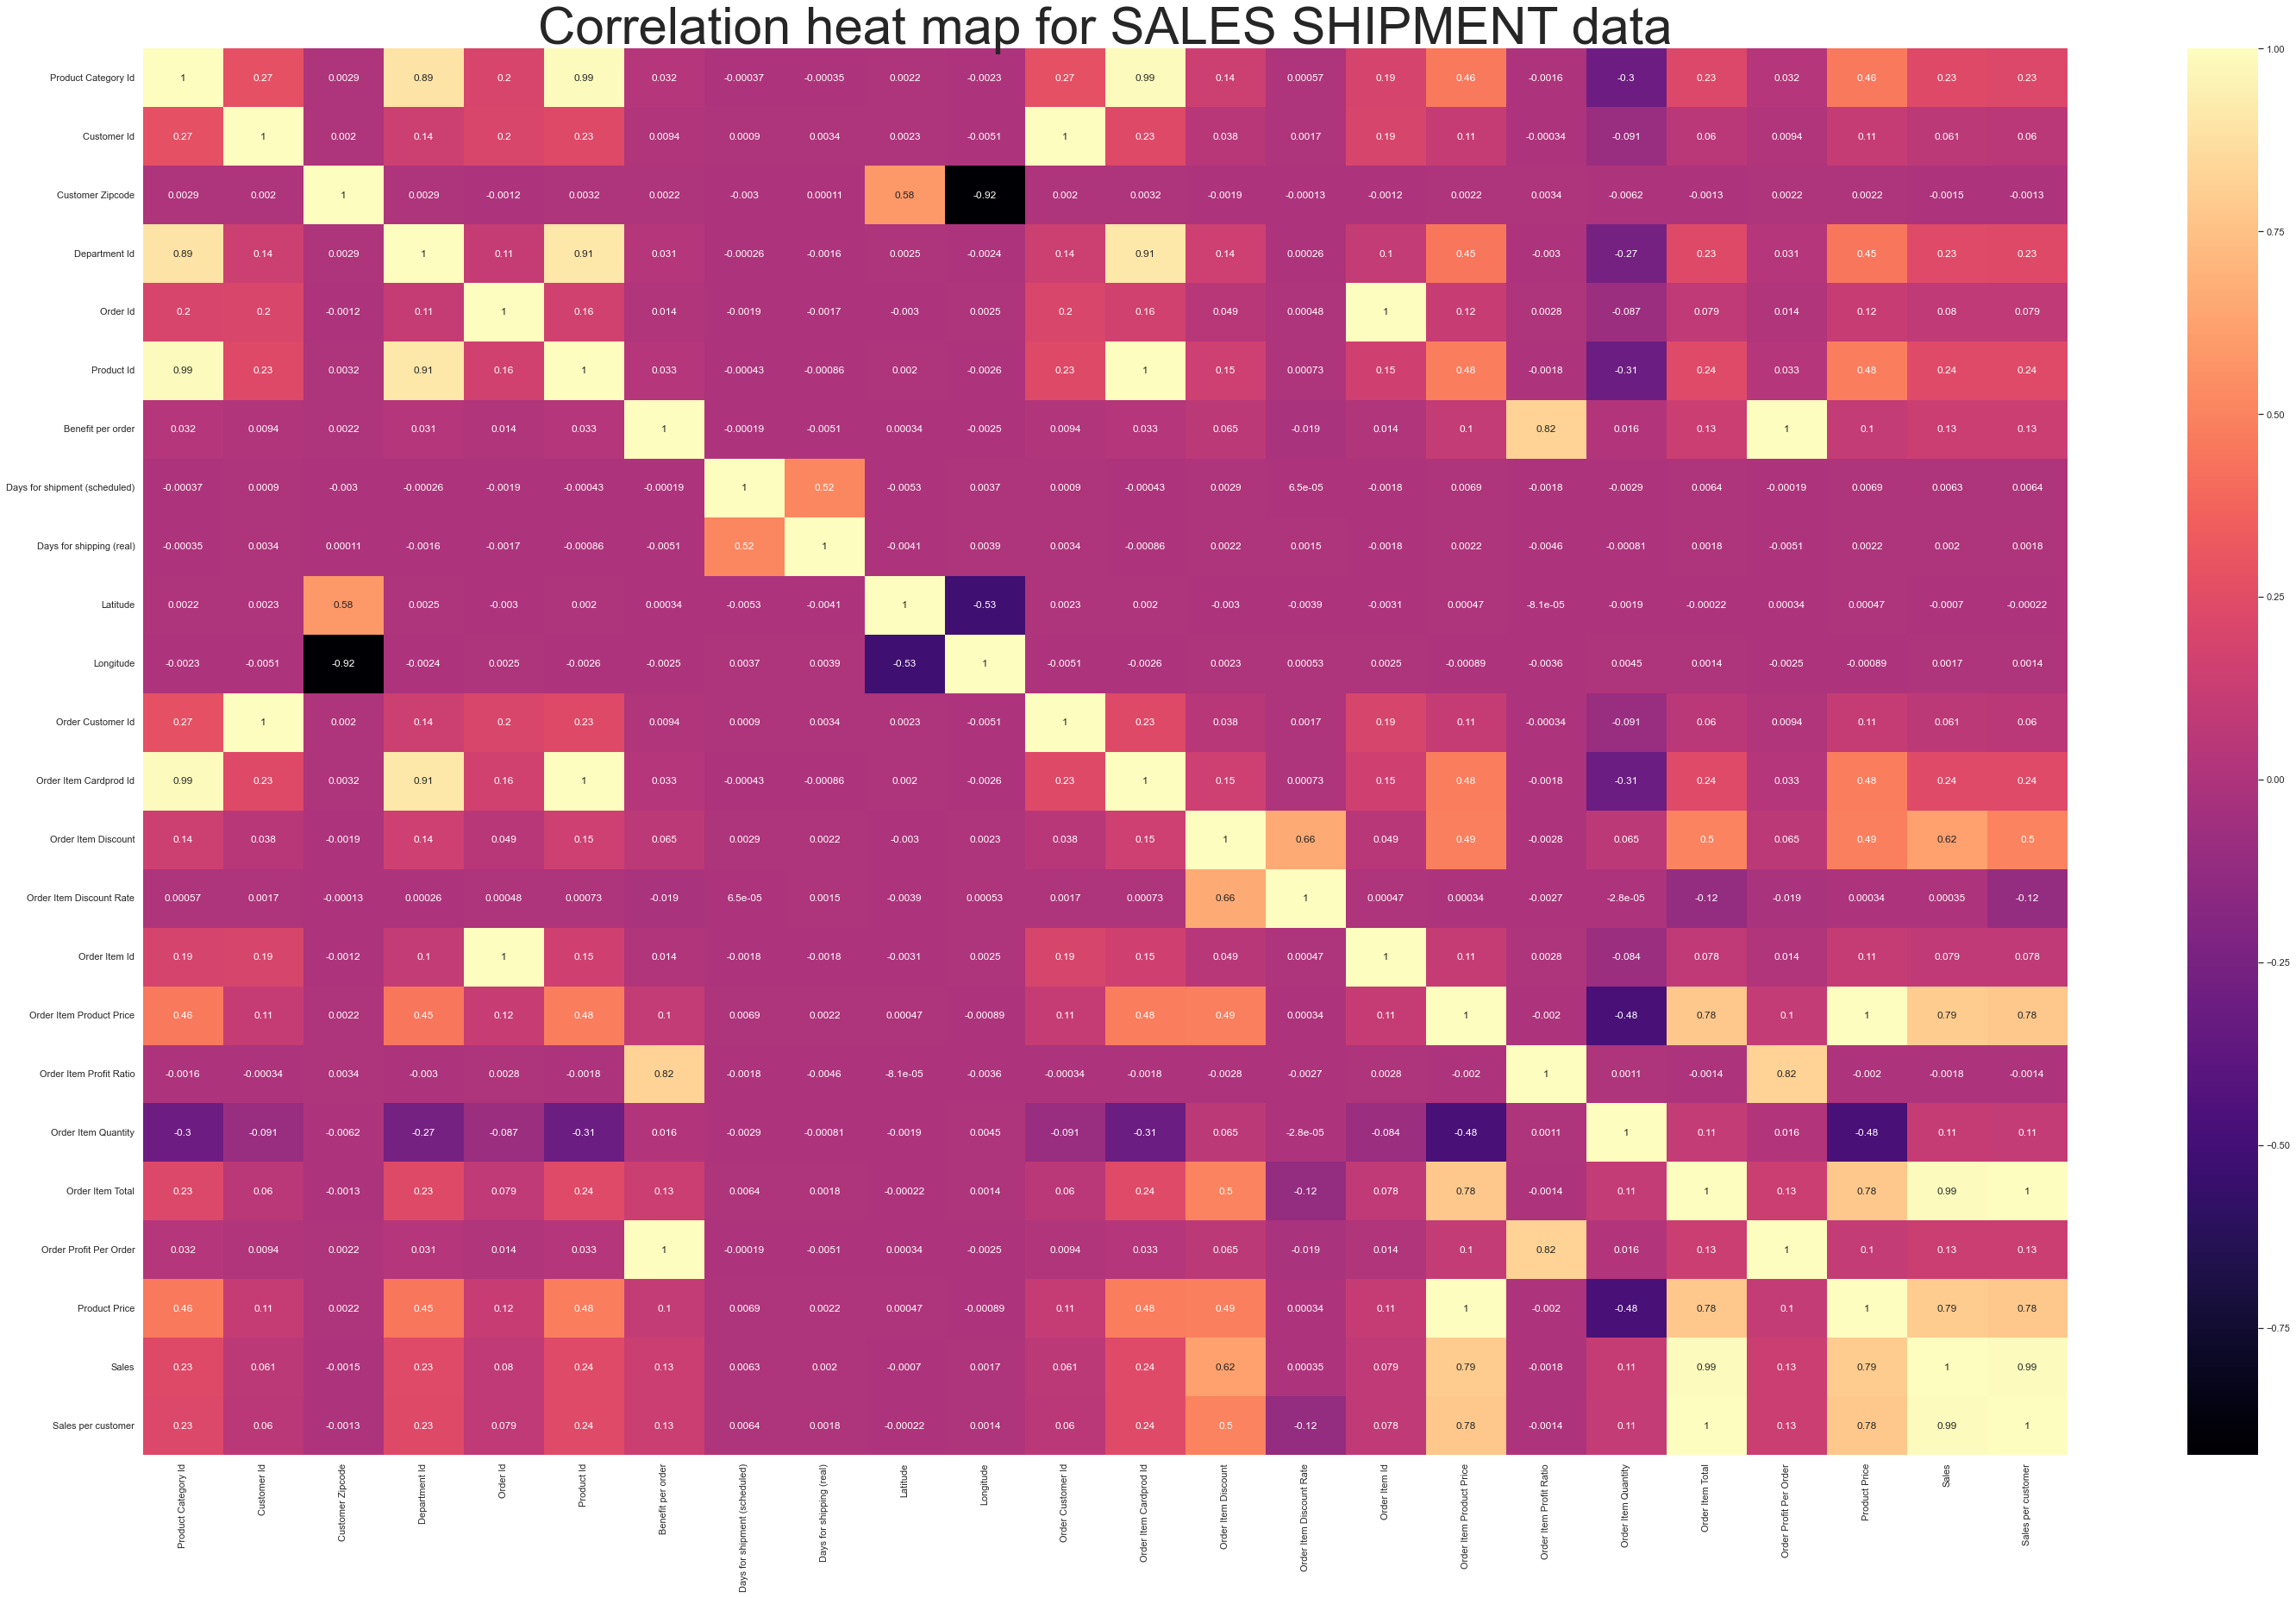

In [21]:
plt.figure(figsize=(50,30))
sns.heatmap(sales_shipment.select_dtypes('number').corr(),annot=True,cmap='magma')
plt.title('Correlation heat map for SALES SHIPMENT data',fontsize=60)
plt.show()

### INVENTORY DATA

In [22]:
inventory.select_dtypes('number').corr().fillna(0)

product id  avg lead time  avg order qty  current stock  \
product id       1.000000            0.0      -0.286631      -0.235948   
avg lead time    0.000000            0.0       0.000000       0.000000   
avg order qty   -0.286631            0.0       1.000000       0.871480   
current stock   -0.235948            0.0       0.871480       1.000000   
max lead time    0.000000            0.0       0.000000       0.000000   
max order qty   -0.286631            0.0       1.000000       0.871480   
mod             -0.001732            0.0      -0.058449       0.363764   
reorder point   -0.286631            0.0       1.000000       0.871480   
safety stock    -0.287076            0.0       0.999930       0.871106   

               max lead time  max order qty       mod  reorder point  \
product id               0.0      -0.286631 -0.001732      -0.286631   
avg lead time            0.0       0.000000  0.000000       0.000000   
avg order qty            0.0       1.000000 -0.058449       1.000000   
current stock            0.0       0.871480  0.363764       0.871480   
max lead time            0.0       0.000000  0.000000       0.000000   
max order qty            0.0       1.000000 -0.058449       1.000000   
mod                      0.0      -0.058449  1.000000      -0.058449   
reorder point            0.0       1.000000 -0.058449       1.000000   
safety stock             0.0       0.999930 -0.058999       0.999930   

               safety stock  
product id        -0.287076  
avg lead time      0.000000  
avg order qty      0.999930  
current stock      0.871106  
max lead time      0.000000  
max order qty      0.999930  
mod               -0.058999  
reorder point      0.999930  
safety stock       1.000000

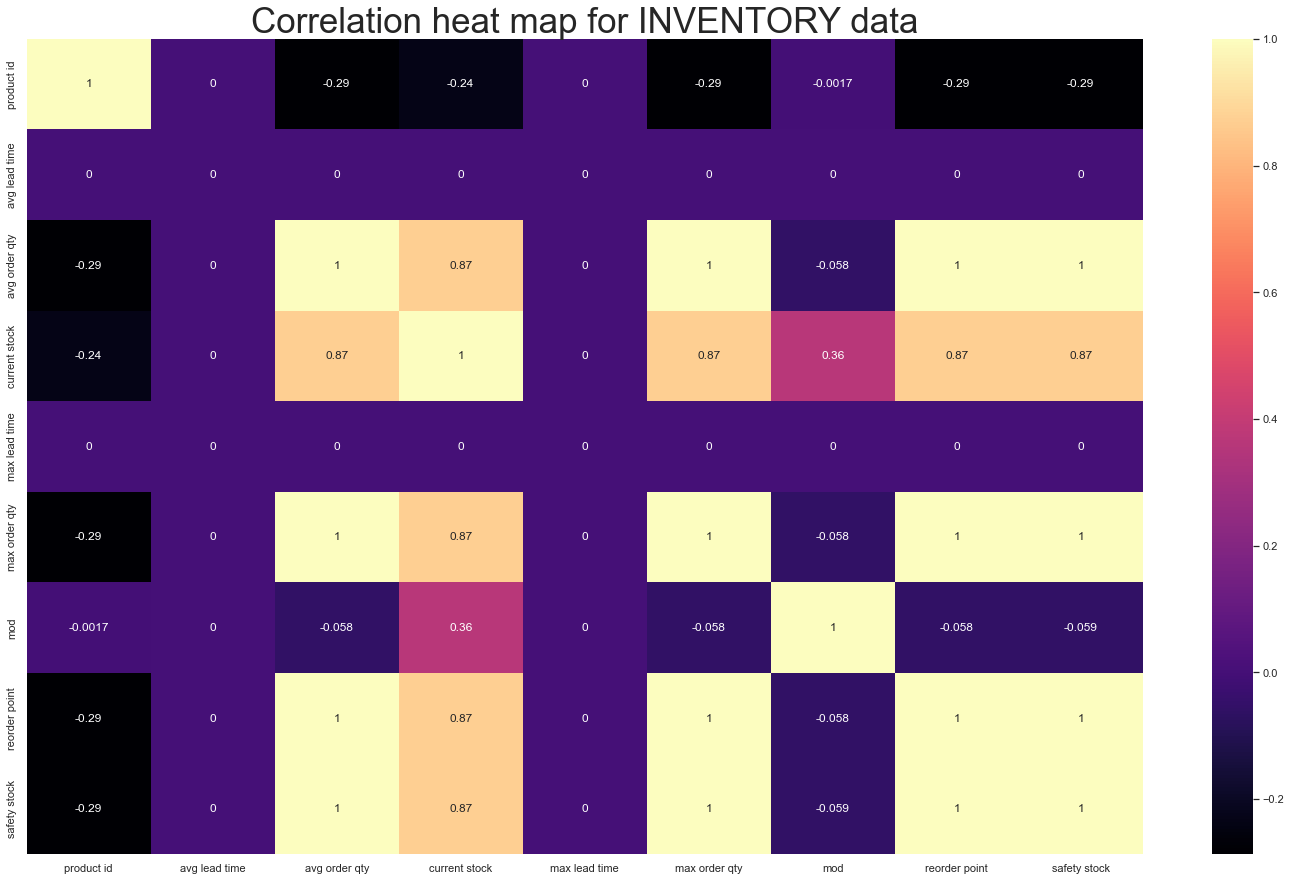

In [23]:
plt.figure(figsize=(25,15))
sns.heatmap(inventory.select_dtypes('number').corr().fillna(0),annot=True,cmap='magma')
plt.title('Correlation heat map for INVENTORY data',fontsize=35)
plt.show()

### 5. Find out data related issues based on the data Audit

### MERGING THE DATASETS.

In [24]:
sales_inventory=pd.merge(left=sales_shipment, right=inventory,left_on='Product Id', right_on='product id',
        how='left')

In [25]:
sales_inventory.head()

Product Category Id    Category Name                           Class  \
0                   24  Women's Apparel  Moderate Value-Moderate Number   
1                   24  Women's Apparel  Moderate Value-Moderate Number   
2                   24  Women's Apparel  Moderate Value-Moderate Number   
3                   24  Women's Apparel  Moderate Value-Moderate Number   
4                   24  Women's Apparel  Moderate Value-Moderate Number   

     Customer City Customer Country Customer Fname  Customer Id  \
0          Roswell          EE. UU.           Jean         5673   
1      Los Angeles          EE. UU.           Rose         9723   
2           Harvey          EE. UU.         Joshua         9511   
3         Elmhurst          EE. UU.           Mary         3326   
4  North Las Vegas          EE. UU.       Samantha          907   

  Customer Lname Customer Segment Customer State  ... product id  \
0           Dunn        Corporate             NM  ...        502   
1          White        Corporate             CA  ...        502   
2          Brady        Corporate             IL  ...        502   
3          Smith        Corporate             IL  ...        502   
4          Kline        Corporate             NV  ...        502   

                           product name avg lead time  avg order qty  \
0  Nike Men's Dri-FIT Victory Golf Polo            10              3   
1  Nike Men's Dri-FIT Victory Golf Polo            10              3   
2  Nike Men's Dri-FIT Victory Golf Polo            10              3   
3  Nike Men's Dri-FIT Victory Golf Polo            10              3   
4  Nike Men's Dri-FIT Victory Golf Polo            10              3   

  current stock max lead time max order qty mod reorder point  safety stock  
0           175            30             5   0           175           146  
1           175            30             5   0           175           146  
2           175            30             5   0           175           146  
3           175            30             5   0           175           146  
4           175            30             5   0           175           146  

[5 rows x 57 columns]

## B. DATA PREPARATION.

### 1. Creat new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) (Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)

In [26]:
pd.set_option('display.max_columns',60)
sales_inventory

Product Category Id     Category Name                           Class  \
0                        24   Women's Apparel  Moderate Value-Moderate Number   
1                        24   Women's Apparel  Moderate Value-Moderate Number   
2                        24   Women's Apparel  Moderate Value-Moderate Number   
3                        24   Women's Apparel  Moderate Value-Moderate Number   
4                        24   Women's Apparel  Moderate Value-Moderate Number   
...                     ...               ...                             ...   
180514                   17            Cleats         High Value-Small Number   
180515                   17            Cleats         High Value-Small Number   
180516                    9  Cardio Equipment         High Value-Small Number   
180517                   17            Cleats         High Value-Small Number   
180518                   17            Cleats         High Value-Small Number   

          Customer City Customer Country Customer Fname  Customer Id  \
0               Roswell          EE. UU.           Jean         5673   
1           Los Angeles          EE. UU.           Rose         9723   
2                Harvey          EE. UU.         Joshua         9511   
3              Elmhurst          EE. UU.           Mary         3326   
4       North Las Vegas          EE. UU.       Samantha          907   
...                 ...              ...            ...          ...   
180514        Escondido          EE. UU.        Charles         9615   
180515          Seattle          EE. UU.        Richard         1971   
180516          Anaheim          EE. UU.           Mary         7663   
180517        San Diego          EE. UU.           Mary          415   
180518       Sacramento          EE. UU.           Mary         7141   

       Customer Lname Customer Segment Customer State  \
0                Dunn        Corporate             NM   
1               White        Corporate             CA   
2               Brady        Corporate             IL   
3               Smith        Corporate             IL   
4               Kline        Corporate             NV   
...               ...              ...            ...   
180514          Smith        Corporate             CA   
180515         Stokes        Corporate             WA   
180516          Smith        Corporate             CA   
180517          Allen        Corporate             CA   
180518        Jackson        Corporate             CA   

                  Customer Street  Customer Zipcode Delivery Status  \
0         8837 Blue Hills Harbour           88201.0            Late   
1       1396 Silver Berry Impasse           90024.0            Late   
2        8414 Wishing Horse Acres           60426.0            Late   
3                  1269 Tawny Key           60126.0            Late   
4          6396 Blue Gate Parkway           89030.0            Late   
...                           ...               ...             ...   
180514           4088 Stony Vista           92026.0            Late   
180515         2865 Blue Rise Way           98115.0            Late   
180516           2792 Stony Range           92804.0            Late   
180517        3983 Golden By-pass           92113.0            Late   
180518         7760 Golden Limits           95822.0            Late   

        Department Id Department Name        Market            Order City  \
0                   5            Golf         LATAM               Tlalpan   
1                   5            Golf         LATAM             Soyapango   
2                   5            Golf         LATAM               Managua   
3                   5            Golf         LATAM  Poza Rica de Hidalgo   
4                   5            Golf         LATAM        San Pedro Sula   
...               ...             ...           ...                   ...   
180514              4         Apparel  Pacific Asia                 Haifa   
180515          

In [27]:
sales_inventory['LateDeliveryRisk'] = np.where((sales_inventory['Days for shipping (real)']) - \
                        (sales_inventory['Days for shipment (scheduled)']) >= 0,'Not Late','Late')
sales_inventory.LateDeliveryRisk.value_counts()

Not Late    137153
Late         43366
Name: LateDeliveryRisk, dtype: int64

In [28]:
sales_inventory

Product Category Id     Category Name                           Class  \
0                        24   Women's Apparel  Moderate Value-Moderate Number   
1                        24   Women's Apparel  Moderate Value-Moderate Number   
2                        24   Women's Apparel  Moderate Value-Moderate Number   
3                        24   Women's Apparel  Moderate Value-Moderate Number   
4                        24   Women's Apparel  Moderate Value-Moderate Number   
...                     ...               ...                             ...   
180514                   17            Cleats         High Value-Small Number   
180515                   17            Cleats         High Value-Small Number   
180516                    9  Cardio Equipment         High Value-Small Number   
180517                   17            Cleats         High Value-Small Number   
180518                   17            Cleats         High Value-Small Number   

          Customer City Customer Country Customer Fname  Customer Id  \
0               Roswell          EE. UU.           Jean         5673   
1           Los Angeles          EE. UU.           Rose         9723   
2                Harvey          EE. UU.         Joshua         9511   
3              Elmhurst          EE. UU.           Mary         3326   
4       North Las Vegas          EE. UU.       Samantha          907   
...                 ...              ...            ...          ...   
180514        Escondido          EE. UU.        Charles         9615   
180515          Seattle          EE. UU.        Richard         1971   
180516          Anaheim          EE. UU.           Mary         7663   
180517        San Diego          EE. UU.           Mary          415   
180518       Sacramento          EE. UU.           Mary         7141   

       Customer Lname Customer Segment Customer State  \
0                Dunn        Corporate             NM   
1               White        Corporate             CA   
2               Brady        Corporate             IL   
3               Smith        Corporate             IL   
4               Kline        Corporate             NV   
...               ...              ...            ...   
180514          Smith        Corporate             CA   
180515         Stokes        Corporate             WA   
180516          Smith        Corporate             CA   
180517          Allen        Corporate             CA   
180518        Jackson        Corporate             CA   

                  Customer Street  Customer Zipcode Delivery Status  \
0         8837 Blue Hills Harbour           88201.0            Late   
1       1396 Silver Berry Impasse           90024.0            Late   
2        8414 Wishing Horse Acres           60426.0            Late   
3                  1269 Tawny Key           60126.0            Late   
4          6396 Blue Gate Parkway           89030.0            Late   
...                           ...               ...             ...   
180514           4088 Stony Vista           92026.0            Late   
180515         2865 Blue Rise Way           98115.0            Late   
180516           2792 Stony Range           92804.0            Late   
180517        3983 Golden By-pass           92113.0            Late   
180518         7760 Golden Limits           95822.0            Late   

        Department Id Department Name        Market            Order City  \
0                   5            Golf         LATAM               Tlalpan   
1                   5            Golf         LATAM             Soyapango   
2                   5            Golf         LATAM               Managua   
3                   5            Golf         LATAM  Poza Rica de Hidalgo   
4                   5            Golf         LATAM        San Pedro Sula   
...               ...             ...           ...                   ...   
180514              4         Apparel  Pacific Asia                 Haifa   
180515          

### 2. Rename the variables as per python naming convensions

In [29]:
sales_inventory.rename(columns=lambda x : x.replace(' ',''),inplace=True)
sales_inventory.rename(columns=lambda x : x.replace('(',''),inplace=True)
sales_inventory.rename(columns=lambda x : x.replace(')',''),inplace=True)
sales_inventory.rename(columns=lambda x : x.replace('-',''),inplace=True)

In [30]:
sales_inventory.columns

Index(['ProductCategoryId', 'CategoryName', 'Class', 'CustomerCity',
       'CustomerCountry', 'CustomerFname', 'CustomerId', 'CustomerLname',
       'CustomerSegment', 'CustomerState', 'CustomerStreet', 'CustomerZipcode',
       'DeliveryStatus', 'DepartmentId', 'DepartmentName', 'Market',
       'OrderCity', 'OrderCountry', 'orderdateDateOrders', 'OrderId',
       'OrderRegion', 'OrderState', 'OrderStatus', 'ProductId', 'ProductName',
       'shippingdateDateOrders', 'ShippingMode', 'Type', 'Benefitperorder',
       'Daysforshipmentscheduled', 'Daysforshippingreal', 'Latitude',
       'Longitude', 'OrderCustomerId', 'OrderItemCardprodId',
       'OrderItemDiscount', 'OrderItemDiscountRate', 'OrderItemId',
       'OrderItemProductPrice', 'OrderItemProfitRatio', 'OrderItemQuantity',
       'OrderItemTotal', 'OrderProfitPerOrder', 'ProductPrice', 'Sales',
       'Salespercustomer', 'ordernow', 'productid', 'productname',
       'avgleadtime', 'avgorderqty', 'currentstock', 'maxleadtime'

### 3. Convert the variables data types as per the data descriptions

In [31]:
sales_inventory['shippingdateDateOrders'] = pd.to_datetime(sales_inventory['shippingdateDateOrders'])
sales_inventory['orderdateDateOrders'] = pd.to_datetime(sales_inventory['orderdateDateOrders'])

In [32]:
sales_inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ProductCategoryId         180519 non-null  int64         
 1   CategoryName              180519 non-null  object        
 2   Class                     180519 non-null  object        
 3   CustomerCity              180519 non-null  object        
 4   CustomerCountry           180519 non-null  object        
 5   CustomerFname             180519 non-null  object        
 6   CustomerId                180519 non-null  int64         
 7   CustomerLname             180511 non-null  object        
 8   CustomerSegment           180519 non-null  object        
 9   CustomerState             180519 non-null  object        
 10  CustomerStreet            180519 non-null  object        
 11  CustomerZipcode           180516 non-null  float64       
 12  De

### 4. Impute missing values with mean for numerical variables, mode for categorical variables

In [33]:
sales_inventory.isna().sum()

ProductCategoryId           0
CategoryName                0
Class                       0
CustomerCity                0
CustomerCountry             0
CustomerFname               0
CustomerId                  0
CustomerLname               8
CustomerSegment             0
CustomerState               0
CustomerStreet              0
CustomerZipcode             3
DeliveryStatus              0
DepartmentId                0
DepartmentName              0
Market                      0
OrderCity                   0
OrderCountry                0
orderdateDateOrders         0
OrderId                     0
OrderRegion                 0
OrderState                  0
OrderStatus                 0
ProductId                   0
ProductName                 0
shippingdateDateOrders      0
ShippingMode                0
Type                        0
Benefitperorder             0
Daysforshipmentscheduled    0
Daysforshippingreal         0
Latitude                    0
Longitude                   0
OrderCusto

In [34]:
sales_inventory.CustomerZipcode = sales_inventory.CustomerZipcode.fillna(sales_inventory.CustomerZipcode.mean())

In [35]:
sales_inventory.CustomerLname = sales_inventory.CustomerLname.fillna(sales_inventory.CustomerLname.mode())

In [36]:
sales_inventory.head()

ProductCategoryId     CategoryName                           Class  \
0                 24  Women's Apparel  Moderate Value-Moderate Number   
1                 24  Women's Apparel  Moderate Value-Moderate Number   
2                 24  Women's Apparel  Moderate Value-Moderate Number   
3                 24  Women's Apparel  Moderate Value-Moderate Number   
4                 24  Women's Apparel  Moderate Value-Moderate Number   

      CustomerCity CustomerCountry CustomerFname  CustomerId CustomerLname  \
0          Roswell         EE. UU.          Jean        5673          Dunn   
1      Los Angeles         EE. UU.          Rose        9723         White   
2           Harvey         EE. UU.        Joshua        9511         Brady   
3         Elmhurst         EE. UU.          Mary        3326         Smith   
4  North Las Vegas         EE. UU.      Samantha         907         Kline   

  CustomerSegment CustomerState             CustomerStreet  CustomerZipcode  \
0       Corporate            NM    8837 Blue Hills Harbour          88201.0   
1       Corporate            CA  1396 Silver Berry Impasse          90024.0   
2       Corporate            IL   8414 Wishing Horse Acres          60426.0   
3       Corporate            IL             1269 Tawny Key          60126.0   
4       Corporate            NV     6396 Blue Gate Parkway          89030.0   

  DeliveryStatus  DepartmentId DepartmentName Market             OrderCity  \
0           Late             5           Golf  LATAM               Tlalpan   
1           Late             5           Golf  LATAM             Soyapango   
2           Late             5           Golf  LATAM               Managua   
3           Late             5           Golf  LATAM  Poza Rica de Hidalgo   
4           Late             5           Golf  LATAM        San Pedro Sula   

  OrderCountry orderdateDateOrders  OrderId      OrderRegion  \
0       México 2017-02-26 17:17:00    53963  Central America   
1  El Salvador 2015-02-27 00:47:00     3908  Central America   
2    Nicaragua 2017-01-29 04:43:00    52009  Central America   
3       México 2015-01-18 04:42:00     1179  Central America   
4     Honduras 2017-03-28 17:36:00    56019  Central America   

         OrderState      OrderStatus  ProductId  \
0  Distrito Federal  Pending Payment        502   
1      San Salvador  Pending Payment        502   
2           Managua   Payment Review        502   
3          Veracruz  Pending Payment        502   
4            Cortés  Pending Payment        502   

                            ProductName shippingdateDateOrders  ShippingMode  \
0  Nike Men's Dri-FIT Victory Golf Polo    2017-03-02 17:17:00  Second Class   
1  Nike Men's Dri-FIT Victory Golf Polo    2015-03-03 00:47:00  Second Class   
2  Nike Men's Dri-FIT Victory Golf Polo    2017-02-03 04:43:00  Second Class   
3  Nike Men's Dri-FIT Victory Golf Polo    2015-01-23 04:42:00  Second Class   
4  Nike Men's Dri-FIT Victory Golf Polo    2017-04-02 17:36:00  Second Class   

      Type  Benefitperorder  Daysforshipmentscheduled  Daysforshippingreal  \
0  PAYMENT         9.610000                         2                    4   
1  PAYMENT         9.490000                         2                    4   
2  PAYMENT        30.709999                         2                    5   
3  PAYMENT        27.549999                         2                    5   
4  PAYMENT        47.500000                         2                    5   

    Latitude   Longitude  OrderCustomerId  OrderItemCardprodId  \
0  33.425201 -104.522080             5673                  502   
1  34.034836 -118.260025             9723                  502   
2  41.623779  -87.648697             9511                  502   
3  41.904102  -87.937843             3326                  502   
4  36.225159 -115.195183              907                  502   

   OrderItemDiscount  OrderItemDiscountRate  OrderItemId  \
0               15.0                   0.15       13

### 5. Perform any other data preparation steps as required?

In [37]:
sales_inventory

ProductCategoryId      CategoryName                           Class  \
0                      24   Women's Apparel  Moderate Value-Moderate Number   
1                      24   Women's Apparel  Moderate Value-Moderate Number   
2                      24   Women's Apparel  Moderate Value-Moderate Number   
3                      24   Women's Apparel  Moderate Value-Moderate Number   
4                      24   Women's Apparel  Moderate Value-Moderate Number   
...                   ...               ...                             ...   
180514                 17            Cleats         High Value-Small Number   
180515                 17            Cleats         High Value-Small Number   
180516                  9  Cardio Equipment         High Value-Small Number   
180517                 17            Cleats         High Value-Small Number   
180518                 17            Cleats         High Value-Small Number   

           CustomerCity CustomerCountry CustomerFname  CustomerId  \
0               Roswell         EE. UU.          Jean        5673   
1           Los Angeles         EE. UU.          Rose        9723   
2                Harvey         EE. UU.        Joshua        9511   
3              Elmhurst         EE. UU.          Mary        3326   
4       North Las Vegas         EE. UU.      Samantha         907   
...                 ...             ...           ...         ...   
180514        Escondido         EE. UU.       Charles        9615   
180515          Seattle         EE. UU.       Richard        1971   
180516          Anaheim         EE. UU.          Mary        7663   
180517        San Diego         EE. UU.          Mary         415   
180518       Sacramento         EE. UU.          Mary        7141   

       CustomerLname CustomerSegment CustomerState             CustomerStreet  \
0               Dunn       Corporate            NM    8837 Blue Hills Harbour   
1              White       Corporate            CA  1396 Silver Berry Impasse   
2              Brady       Corporate            IL   8414 Wishing Horse Acres   
3              Smith       Corporate            IL             1269 Tawny Key   
4              Kline       Corporate            NV     6396 Blue Gate Parkway   
...              ...             ...           ...                        ...   
180514         Smith       Corporate            CA           4088 Stony Vista   
180515        Stokes       Corporate            WA         2865 Blue Rise Way   
180516         Smith       Corporate            CA           2792 Stony Range   
180517         Allen       Corporate            CA        3983 Golden By-pass   
180518       Jackson       Corporate            CA         7760 Golden Limits   

        CustomerZipcode DeliveryStatus  DepartmentId DepartmentName  \
0               88201.0           Late             5           Golf   
1               90024.0           Late             5           Golf   
2               60426.0           Late             5           Golf   
3               60126.0           Late             5           Golf   
4               89030.0           Late             5           Golf   
...                 ...            ...           ...            ...   
180514          92026.0           Late             4        Apparel   
180515          98115.0           Late             4        Apparel   
180516          92804.0           Late             3       Footwear   
180517          92113.0           Late             4        Apparel   
180518          95822.0           Late             4        Apparel   

              Market             OrderCity        OrderCountry  \
0              LATAM               Tlalpan              México   
1              LATAM             Soyapango         El Salvador   
2              LATAM               Managua           Nicaragua   
3              LATAM  Poza Rica de Hidalgo              México   
4              LATAM        San Pedro Sula            Honduras   
...     

In [38]:
sales_inventory['week'] = sales_inventory['orderdateDateOrders'].dt.isocalendar().week
sales_inventory['month'] = sales_inventory['orderdateDateOrders'].dt.month_name()
sales_inventory['year'] = sales_inventory['orderdateDateOrders'].dt.year
sales_inventory['quarter'] = sales_inventory['orderdateDateOrders'].dt.quarter

## C. DATA ANALYSIS 

### 1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc

In [39]:
sales_inventory.head()

ProductCategoryId     CategoryName                           Class  \
0                 24  Women's Apparel  Moderate Value-Moderate Number   
1                 24  Women's Apparel  Moderate Value-Moderate Number   
2                 24  Women's Apparel  Moderate Value-Moderate Number   
3                 24  Women's Apparel  Moderate Value-Moderate Number   
4                 24  Women's Apparel  Moderate Value-Moderate Number   

      CustomerCity CustomerCountry CustomerFname  CustomerId CustomerLname  \
0          Roswell         EE. UU.          Jean        5673          Dunn   
1      Los Angeles         EE. UU.          Rose        9723         White   
2           Harvey         EE. UU.        Joshua        9511         Brady   
3         Elmhurst         EE. UU.          Mary        3326         Smith   
4  North Las Vegas         EE. UU.      Samantha         907         Kline   

  CustomerSegment CustomerState             CustomerStreet  CustomerZipcode  \
0       Corporate            NM    8837 Blue Hills Harbour          88201.0   
1       Corporate            CA  1396 Silver Berry Impasse          90024.0   
2       Corporate            IL   8414 Wishing Horse Acres          60426.0   
3       Corporate            IL             1269 Tawny Key          60126.0   
4       Corporate            NV     6396 Blue Gate Parkway          89030.0   

  DeliveryStatus  DepartmentId DepartmentName Market             OrderCity  \
0           Late             5           Golf  LATAM               Tlalpan   
1           Late             5           Golf  LATAM             Soyapango   
2           Late             5           Golf  LATAM               Managua   
3           Late             5           Golf  LATAM  Poza Rica de Hidalgo   
4           Late             5           Golf  LATAM        San Pedro Sula   

  OrderCountry orderdateDateOrders  OrderId      OrderRegion  \
0       México 2017-02-26 17:17:00    53963  Central America   
1  El Salvador 2015-02-27 00:47:00     3908  Central America   
2    Nicaragua 2017-01-29 04:43:00    52009  Central America   
3       México 2015-01-18 04:42:00     1179  Central America   
4     Honduras 2017-03-28 17:36:00    56019  Central America   

         OrderState      OrderStatus  ProductId  \
0  Distrito Federal  Pending Payment        502   
1      San Salvador  Pending Payment        502   
2           Managua   Payment Review        502   
3          Veracruz  Pending Payment        502   
4            Cortés  Pending Payment        502   

                            ProductName shippingdateDateOrders  ShippingMode  \
0  Nike Men's Dri-FIT Victory Golf Polo    2017-03-02 17:17:00  Second Class   
1  Nike Men's Dri-FIT Victory Golf Polo    2015-03-03 00:47:00  Second Class   
2  Nike Men's Dri-FIT Victory Golf Polo    2017-02-03 04:43:00  Second Class   
3  Nike Men's Dri-FIT Victory Golf Polo    2015-01-23 04:42:00  Second Class   
4  Nike Men's Dri-FIT Victory Golf Polo    2017-04-02 17:36:00  Second Class   

      Type  Benefitperorder  Daysforshipmentscheduled  ...   Longitude  \
0  PAYMENT         9.610000                         2  ... -104.522080   
1  PAYMENT         9.490000                         2  ... -118.260025   
2  PAYMENT        30.709999                         2  ...  -87.648697   
3  PAYMENT        27.549999                         2  ...  -87.937843   
4  PAYMENT        47.500000                         2  ... -115.195183   

   OrderCustomerId  OrderItemCardprodId  OrderItemDiscount  \
0             5673                  502               15.0   
1             9723                  502               16.0   
2             9511                  502                5.5   
3             3326                  502                5.0   
4              907                  502                5.0   

   OrderItemDiscountRate  OrderItemId  OrderItemProductPrice  \
0                   0.15       134920                   50.0   
1                   0.16        

In [40]:
print('Total Sales value :',sales_inventory.Sales.sum())

Total Sales value : 36784735.01337984


In [41]:
print('Total Sales unit :',sales_inventory.OrderItemQuantity.sum())

Total Sales unit : 384079


In [42]:
inventory_value = sales_inventory['currentstock'] * sales_inventory['ProductPrice']
total_inventory_value = inventory_value.sum()

In [43]:
print('Inventory value :',total_inventory_value)

Inventory value : 2536160997.4468727


In [44]:
print('Profit value :',sales_inventory.OrderProfitPerOrder.sum())

Profit value : 3966902.9740503575


In [45]:
print('Number of distinct products :',sales_inventory.ProductId.nunique())

Number of distinct products : 118


In [46]:
print('Number of distinct categories :',sales_inventory.CategoryName.nunique())

Number of distinct categories : 50


In [47]:
print('Number of distinct Customer:' , sales_inventory.CustomerId.nunique())

Number of distinct Customer: 20652


In [48]:
print('Number of Cities :',sales_inventory.CustomerCity.nunique())

Number of Cities : 563


### 2. Status of orders (number of orders by current status)

In [49]:
sales_inventory.OrderStatus.value_counts()

Complete           59491
Pending Payment    39832
Processing         21902
Pending            20227
Closed             19616
On Hold             9804
Suspected Fraud     4062
Canceled            3692
Payment Review      1893
Name: OrderStatus, dtype: int64

### 3. Status of Delivery of orders (number of orders by each type of delivery status)

In [50]:
sales_inventory.DeliveryStatus.value_counts()

Late        98977
Advance     41592
On time     32196
Canceled     7754
Name: DeliveryStatus, dtype: int64

### 4. Late Delivery Risk by time (by each week, month, year, quarter)

In [51]:
pd.set_option('display.max_columns',100)
sales_inventory.head()

ProductCategoryId     CategoryName                           Class  \
0                 24  Women's Apparel  Moderate Value-Moderate Number   
1                 24  Women's Apparel  Moderate Value-Moderate Number   
2                 24  Women's Apparel  Moderate Value-Moderate Number   
3                 24  Women's Apparel  Moderate Value-Moderate Number   
4                 24  Women's Apparel  Moderate Value-Moderate Number   

      CustomerCity CustomerCountry CustomerFname  CustomerId CustomerLname  \
0          Roswell         EE. UU.          Jean        5673          Dunn   
1      Los Angeles         EE. UU.          Rose        9723         White   
2           Harvey         EE. UU.        Joshua        9511         Brady   
3         Elmhurst         EE. UU.          Mary        3326         Smith   
4  North Las Vegas         EE. UU.      Samantha         907         Kline   

  CustomerSegment CustomerState             CustomerStreet  CustomerZipcode  \
0       Corporate            NM    8837 Blue Hills Harbour          88201.0   
1       Corporate            CA  1396 Silver Berry Impasse          90024.0   
2       Corporate            IL   8414 Wishing Horse Acres          60426.0   
3       Corporate            IL             1269 Tawny Key          60126.0   
4       Corporate            NV     6396 Blue Gate Parkway          89030.0   

  DeliveryStatus  DepartmentId DepartmentName Market             OrderCity  \
0           Late             5           Golf  LATAM               Tlalpan   
1           Late             5           Golf  LATAM             Soyapango   
2           Late             5           Golf  LATAM               Managua   
3           Late             5           Golf  LATAM  Poza Rica de Hidalgo   
4           Late             5           Golf  LATAM        San Pedro Sula   

  OrderCountry orderdateDateOrders  OrderId      OrderRegion  \
0       México 2017-02-26 17:17:00    53963  Central America   
1  El Salvador 2015-02-27 00:47:00     3908  Central America   
2    Nicaragua 2017-01-29 04:43:00    52009  Central America   
3       México 2015-01-18 04:42:00     1179  Central America   
4     Honduras 2017-03-28 17:36:00    56019  Central America   

         OrderState      OrderStatus  ProductId  \
0  Distrito Federal  Pending Payment        502   
1      San Salvador  Pending Payment        502   
2           Managua   Payment Review        502   
3          Veracruz  Pending Payment        502   
4            Cortés  Pending Payment        502   

                            ProductName shippingdateDateOrders  ShippingMode  \
0  Nike Men's Dri-FIT Victory Golf Polo    2017-03-02 17:17:00  Second Class   
1  Nike Men's Dri-FIT Victory Golf Polo    2015-03-03 00:47:00  Second Class   
2  Nike Men's Dri-FIT Victory Golf Polo    2017-02-03 04:43:00  Second Class   
3  Nike Men's Dri-FIT Victory Golf Polo    2015-01-23 04:42:00  Second Class   
4  Nike Men's Dri-FIT Victory Golf Polo    2017-04-02 17:36:00  Second Class   

      Type  Benefitperorder  Daysforshipmentscheduled  Daysforshippingreal  \
0  PAYMENT         9.610000                         2                    4   
1  PAYMENT         9.490000                         2                    4   
2  PAYMENT        30.709999                         2                    5   
3  PAYMENT        27.549999                         2                    5   
4  PAYMENT        47.500000                         2                    5   

    Latitude   Longitude  OrderCustomerId  OrderItemCardprodId  \
0  33.425201 -104.522080             5673                  502   
1  34.034836 -118.260025             9723                  502   
2  41.623779  -87.648697             9511                  502   
3  41.904102  -87.937843             3326                  502   
4  36.225159 -115.195183              907                  502   

   OrderItemDiscount  OrderItemDiscountRate  OrderItemId  \
0               15.0                   0.15       13

In [52]:
sales_inventory.groupby('week')['LateDeliveryRisk'].value_counts().unstack()

LateDeliveryRisk  Late  Not Late
week                            
1                  894      2602
2                  956      3057
3                  896      3214
4                 1022      3069
5                  929      2917
6                  865      2659
7                  796      2761
8                  959      2688
9                  838      2807
10                 861      2751
11                 875      2699
12                 890      2615
13                 858      2748
14                 969      2694
15                 853      2804
16                 883      2817
17                 816      2614
18                 812      2756
19                 916      2702
20                 850      2724
21                 752      2798
22                 906      2812
23                 862      2632
24                 784      2657
25                 908      2721
26                 842      2711
27                 875      2775
28                 874      2696
29                 929      2749
30                 781      2731
31                 878      2680
32                 923      2627
33                 863      2737
34                 777      2834
35                 915      2696
36                 870      2747
37                 992      2709
38                 768      2784
39                 865      2759
40                 653      2200
41                 734      2183
42                 663      2247
43                 644      2223
44                 748      2166
45                 698      2259
46                 693      2175
47                 719      2234
48                 665      2230
49                 706      2188
50                 687      2138
51                 602      2223
52                 733      2219
53                 319       915

In [53]:
px.line(sales_inventory.groupby('week')['LateDeliveryRisk'].value_counts().unstack(),
        title='LATE DELIVERY RISK BY WEEK ')



In [54]:
sales_inventory.groupby('month')['LateDeliveryRisk'].value_counts().unstack()

LateDeliveryRisk  Late  Not Late
month                           
April             3764     11671
August            3834     12078
December          3030      9734
February          3528     11001
January           4304     13675
July              3835     12087
June              3667     11472
March             3888     12031
May               3699     12277
November          3000      9500
October           3095      9860
September         3722     11767

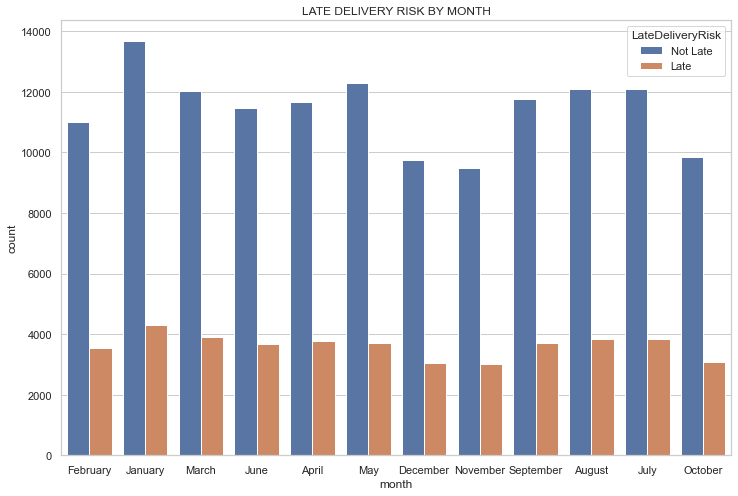

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x='month', hue='LateDeliveryRisk', data=sales_inventory)
plt.title('LATE DELIVERY RISK BY MONTH')
plt.savefig('LATE DELIVERY RISK BY MONTH.png')
plt.show()


In [56]:
sales_inventory.groupby('quarter')['LateDeliveryRisk'].value_counts().unstack()

LateDeliveryRisk   Late  Not Late
quarter                          
1                 11720     36707
2                 11130     35420
3                 11391     35932
4                  9125     29094

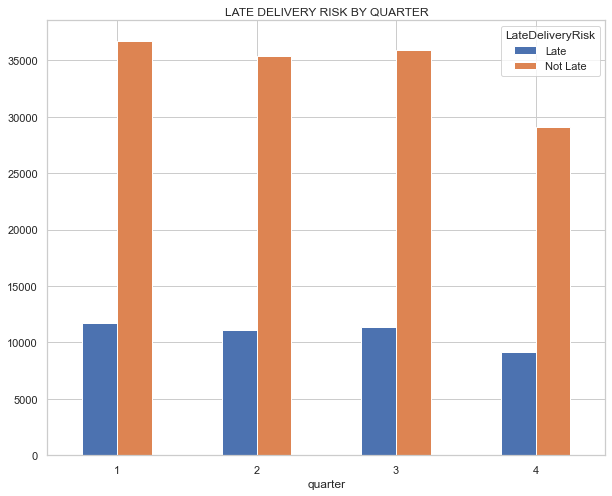

In [57]:
sales_inventory.groupby('quarter')['LateDeliveryRisk'].value_counts().unstack().plot(kind='bar',rot=0,figsize=(10,8))
plt.title('LATE DELIVERY RISK BY QUARTER')
plt.savefig('LATE DELIVERY RISK BY QUARTER.png')
plt.show()

In [58]:
sales_inventory.groupby('year')['LateDeliveryRisk'].value_counts().unstack()

LateDeliveryRisk   Late  Not Late
year                             
2015              15213     47437
2016              14871     47679
2017              12795     40401
2018                487      1636

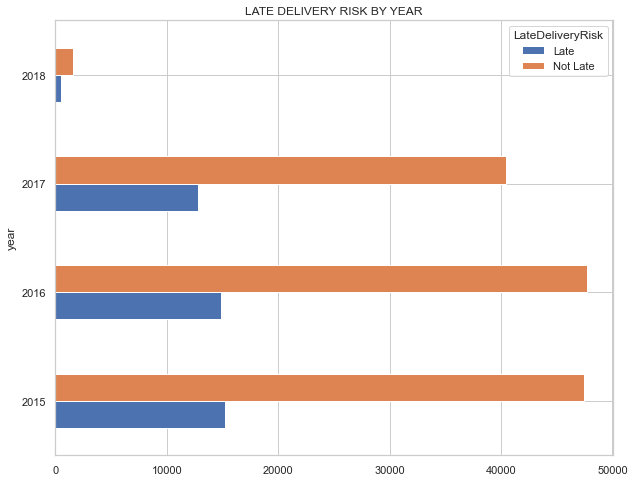

In [59]:
sales_inventory.groupby('year')['LateDeliveryRisk'].value_counts().unstack().plot(kind='barh',figsize=(10,8))
plt.title('LATE DELIVERY RISK BY YEAR')
plt.savefig('LATE DELIVERY RISK BY YEAR.png')
plt.show()

### 5. Order Item qty by time (by each week, month, year, quarter)

In [60]:
pd.DataFrame(sales_inventory.groupby('week')['OrderItemQuantity'].sum())

OrderItemQuantity
week                   
1                  7064
2                  8200
3                  8672
4                  8540
5                  8186
6                  7812
7                  7878
8                  8163
9                  8089
10                 7951
11                 7846
12                 7672
13                 7973
14                 7979
15                 7940
16                 8247
17                 7452
18                 7715
19                 7738
20                 7792
21                 7653
22                 7999
23                 7491
24                 7204
25                 7920
26                 7654
27                 7950
28                 7765
29                 7948
30                 7540
31                 7748
32                 7653
33                 7760
34                 7672
35                 7968
36                 7753
37                 7793
38                 7650
39                 7886
40                 5682
41                 5951
42                 5810
43                 5762
44                 5761
45                 5822
46                 5821
47                 5934
48                 5773
49                 5813
50                 5670
51                 5779
52                 5938
53                 2647

In [61]:
px.line(sales_inventory.groupby('week')['OrderItemQuantity'].sum(),title='ORDER ITEM QUANTITY BY WEEK')

In [62]:
sales_inventory.groupby('month')['OrderItemQuantity'].sum().reset_index()

month  OrderItemQuantity
0       April              33684
1      August              34390
2    December              25688
3    February              32273
4     January              37179
5        July              34543
6        June              32405
7       March              35087
8         May              34538
9    November              25011
10    October              26129
11  September              33152

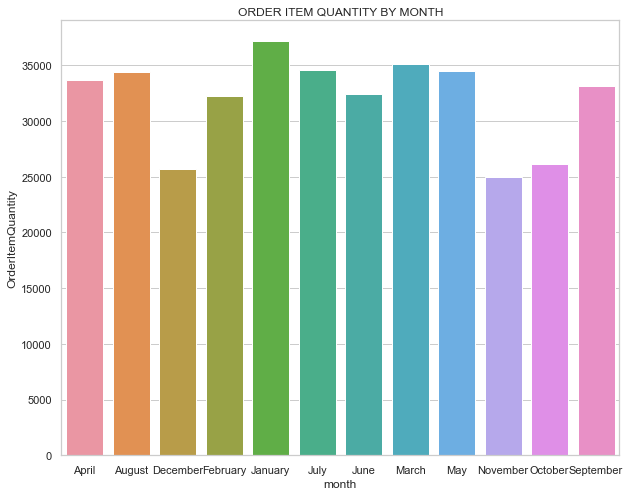

In [63]:
plt.figure(figsize=(10,8))
sns.barplot(sales_inventory.groupby('month')['OrderItemQuantity'].sum().reset_index(),x ='month',y='OrderItemQuantity')
plt.title('ORDER ITEM QUANTITY BY MONTH')
plt.savefig('ORDER ITEM QUANTITY BY MONTH.png')
plt.show()


In [64]:
sales_inventory.groupby('quarter')['OrderItemQuantity'].sum().reset_index()

quarter  OrderItemQuantity
0        1             104539
1        2             100627
2        3             102085
3        4              76828

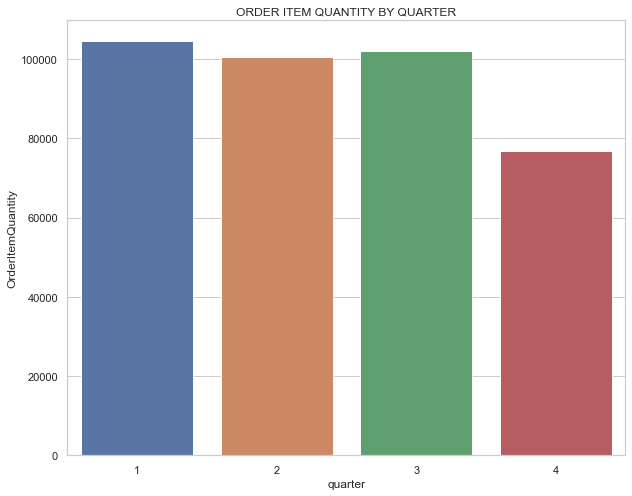

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(sales_inventory.groupby('quarter')['OrderItemQuantity'].sum().reset_index(),x ='quarter',y='OrderItemQuantity')
plt.title('ORDER ITEM QUANTITY BY QUARTER')
plt.savefig('ORDER ITEM QUANTITY BY QUARTER.png')
plt.show()

In [66]:
sales_inventory.groupby('year')['OrderItemQuantity'].sum().reset_index()

year  OrderItemQuantity
0  2015             138480
1  2016             137352
2  2017             106124
3  2018               2123

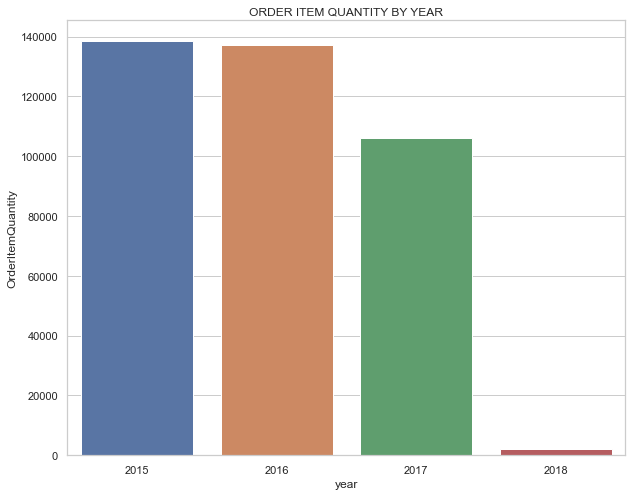

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(sales_inventory.groupby('year')['OrderItemQuantity'].sum().reset_index(),x ='year',y='OrderItemQuantity')
plt.title('ORDER ITEM QUANTITY BY YEAR')
plt.savefig('ORDER ITEM QUANTITY BY YEAR.png')
plt.show()

### 6. Sales units/value  by time (by each week, month, year, quarter)

In [68]:
df = sales_inventory.groupby('week').agg({'Sales':'sum'})
df

Sales
week               
1     729684.503659
2     789794.354346
3     731081.593856
4     761127.384836
5     769817.035622
6     691626.223329
7     713610.964081
8     721985.423667
9     713596.704159
10    704252.943897
11    713621.044274
12    687641.443884
13    704602.863729
14    720465.254684
15    719986.614364
16    737354.064329
17    680931.893121
18    719127.964536
19    716964.584104
20    714551.953859
21    705676.103941
22    741125.894740
23    701731.483644
24    701705.504078
25    736187.684495
26    715688.793632
27    740662.444542
28    714099.724107
29    736269.354333
30    692819.703417
31    713067.043571
32    699718.913913
33    725139.244633
34    730598.024612
35    718004.734072
36    729233.764479
37    752277.613394
38    725609.332539
39    773545.522705
40    500514.049425
41    661554.502700
42    665595.672682
43    935323.590290
44    742215.532341
45    610157.883382
46    702299.036655
47    613084.851162
48    565838.909062
49    500844.399317
50    526639.510996
51    667729.489940
52    661259.433757
53    236692.454488

In [69]:
px.line(df)

In [70]:
df1 = sales_inventory.groupby('month').agg({'Sales':'sum'})
df1

Sales
month                  
April      3.053996e+06
August     3.187032e+06
December   2.599160e+06
February   2.888088e+06
January    3.459246e+06
July       3.188170e+06
June       3.059152e+06
March      3.125112e+06
May        3.185364e+06
November   2.703625e+06
October    3.171279e+06
September  3.164511e+06

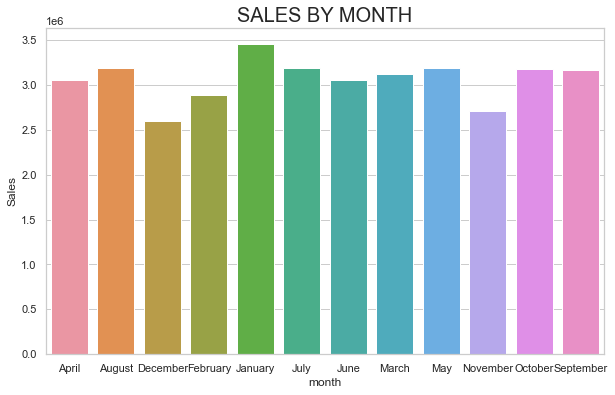

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(df1,x=df1.index,y=df1.Sales)
plt.title('SALES BY MONTH',fontsize=20)
plt.savefig('SALES BY MONTH.png')
plt.show()

In [72]:
df2 = sales_inventory.groupby('quarter').agg({'Sales':'sum'})
df2

Sales
quarter              
1        9.472446e+06
2        9.298513e+06
3        9.539713e+06
4        8.474064e+06

In [73]:
px.line(df2.Sales,title='SALES BY QUARTER')



In [74]:
df4 = sales_inventory.groupby('year').agg({'Sales':'sum'})
df4

Sales
year              
2015  1.234083e+07
2016  1.230382e+07
2017  1.180844e+07
2018  3.316501e+05

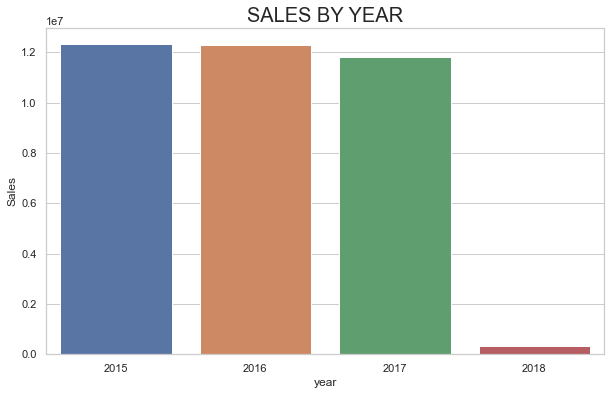

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(df4,x=df4.index,y=df4.Sales)
plt.title('SALES BY YEAR',fontsize=20)
plt.savefig('SALES BY YEAR.png')
plt.show()

### 7. Profit orders/value  by time (by each week, month, year, quarter)

In [76]:
profit_orders = sales_inventory[sales_inventory.OrderProfitPerOrder>0]
profit_orders.head()

ProductCategoryId     CategoryName                           Class  \
0                 24  Women's Apparel  Moderate Value-Moderate Number   
1                 24  Women's Apparel  Moderate Value-Moderate Number   
2                 24  Women's Apparel  Moderate Value-Moderate Number   
3                 24  Women's Apparel  Moderate Value-Moderate Number   
4                 24  Women's Apparel  Moderate Value-Moderate Number   

      CustomerCity CustomerCountry CustomerFname  CustomerId CustomerLname  \
0          Roswell         EE. UU.          Jean        5673          Dunn   
1      Los Angeles         EE. UU.          Rose        9723         White   
2           Harvey         EE. UU.        Joshua        9511         Brady   
3         Elmhurst         EE. UU.          Mary        3326         Smith   
4  North Las Vegas         EE. UU.      Samantha         907         Kline   

  CustomerSegment CustomerState             CustomerStreet  CustomerZipcode  \
0       Corporate            NM    8837 Blue Hills Harbour          88201.0   
1       Corporate            CA  1396 Silver Berry Impasse          90024.0   
2       Corporate            IL   8414 Wishing Horse Acres          60426.0   
3       Corporate            IL             1269 Tawny Key          60126.0   
4       Corporate            NV     6396 Blue Gate Parkway          89030.0   

  DeliveryStatus  DepartmentId DepartmentName Market             OrderCity  \
0           Late             5           Golf  LATAM               Tlalpan   
1           Late             5           Golf  LATAM             Soyapango   
2           Late             5           Golf  LATAM               Managua   
3           Late             5           Golf  LATAM  Poza Rica de Hidalgo   
4           Late             5           Golf  LATAM        San Pedro Sula   

  OrderCountry orderdateDateOrders  OrderId      OrderRegion  \
0       México 2017-02-26 17:17:00    53963  Central America   
1  El Salvador 2015-02-27 00:47:00     3908  Central America   
2    Nicaragua 2017-01-29 04:43:00    52009  Central America   
3       México 2015-01-18 04:42:00     1179  Central America   
4     Honduras 2017-03-28 17:36:00    56019  Central America   

         OrderState      OrderStatus  ProductId  \
0  Distrito Federal  Pending Payment        502   
1      San Salvador  Pending Payment        502   
2           Managua   Payment Review        502   
3          Veracruz  Pending Payment        502   
4            Cortés  Pending Payment        502   

                            ProductName shippingdateDateOrders  ShippingMode  \
0  Nike Men's Dri-FIT Victory Golf Polo    2017-03-02 17:17:00  Second Class   
1  Nike Men's Dri-FIT Victory Golf Polo    2015-03-03 00:47:00  Second Class   
2  Nike Men's Dri-FIT Victory Golf Polo    2017-02-03 04:43:00  Second Class   
3  Nike Men's Dri-FIT Victory Golf Polo    2015-01-23 04:42:00  Second Class   
4  Nike Men's Dri-FIT Victory Golf Polo    2017-04-02 17:36:00  Second Class   

      Type  Benefitperorder  Daysforshipmentscheduled  Daysforshippingreal  \
0  PAYMENT         9.610000                         2                    4   
1  PAYMENT         9.490000                         2                    4   
2  PAYMENT        30.709999                         2                    5   
3  PAYMENT        27.549999                         2                    5   
4  PAYMENT        47.500000                         2                    5   

    Latitude   Longitude  OrderCustomerId  OrderItemCardprodId  \
0  33.425201 -104.522080             5673                  502   
1  34.034836 -118.260025             9723                  502   
2  41.623779  -87.648697             9511                  502   
3  41.904102  -87.937843             3326                  502   
4  36.225159 -115.195183              907                  502   

   OrderItemDiscount  OrderItemDiscountRate  OrderItemId  \
0               15.0                   0.15       13

In [77]:
profit_orders.groupby('week').agg({'OrderId':'count','Sales':'sum'})

OrderId          Sales
week                        
1        2866  603619.521260
2        3191  626881.771327
3        3313  590488.661188
4        3238  598997.021858
5        3142  627060.312679
6        2884  566915.990911
7        2820  564596.691133
8        2972  586669.621074
9        2956  578901.761520
10       2890  561571.751110
11       2814  560821.681164
12       2868  563932.361367
13       2934  575548.761212
14       2954  584901.451964
15       2953  582856.751684
16       2979  598075.551508
17       2758  549290.210539
18       2858  579958.281681
19       2888  571143.191312
20       2898  577046.171231
21       2832  562393.841179
22       3022  603096.291965
23       2824  567623.250870
24       2815  572496.801438
25       2896  584159.121422
26       2831  568266.400821
27       2941  597931.461823
28       2860  574229.741333
29       2960  597855.821683
30       2825  551664.630627
31       2867  575752.420795
32       2868  566628.121326
33       2903  581790.231711
34       2930  591692.032061
35       2934  584543.531422
36       2919  587890.651684
37       3002  609424.520816
38       2877  590791.930206
39       2962  629059.340618
40       2307  400737.757686
41       2385  539683.480423
42       2338  533500.020203
43       2334  763085.578408
44       2355  602674.129999
45       2360  487556.050731
46       2292  563626.793316
47       2362  484877.608805
48       2356  463807.447488
49       2328  404469.617581
50       2259  422256.518889
51       2275  549739.488006
52       2366  528122.971032
53        997  191826.763672

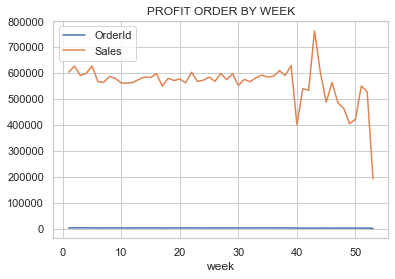

In [78]:
profit_orders.groupby('week').agg({'OrderId':'count','Sales':'sum'}).plot(kind='line')
plt.title('PROFIT ORDER BY WEEK')
plt.savefig('PROFIT ORDER BY WEEK.png')
plt.show()

In [79]:
profit_orders.groupby('month').agg({'OrderId':'count'})

OrderId
month             
April        12430
August       12860
December     10266
February     11748
January      14460
July         12791
June         12189
March        12847
May          12852
November     10011
October      10521
September    12583

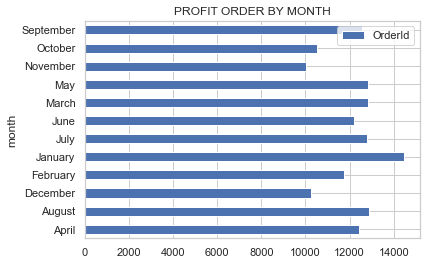

In [80]:
profit_orders.groupby('month').agg({'OrderId':'count'}).plot(kind='barh')
plt.title('PROFIT ORDER BY MONTH')
plt.savefig('PROFIT ORDER BY MONTH.png')
plt.show()

In [81]:
profit_orders.groupby('quarter').agg({'OrderId':'count'})

OrderId
quarter         
1          39055
2          37471
3          38234
4          30798

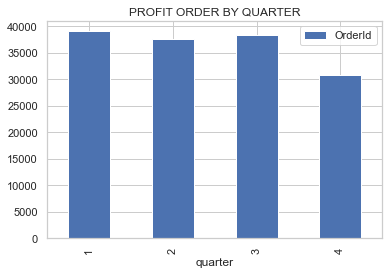

In [82]:
profit_orders.groupby('quarter').agg({'OrderId':'count'}).plot(kind='bar')
plt.title('PROFIT ORDER BY QUARTER')
plt.savefig('PROFIT ORDER BY QUARTER.png')
plt.show()

In [83]:
profit_orders.groupby('year').agg({'OrderId':'count'})

OrderId
year         
2015    50517
2016    50351
2017    42992
2018     1698

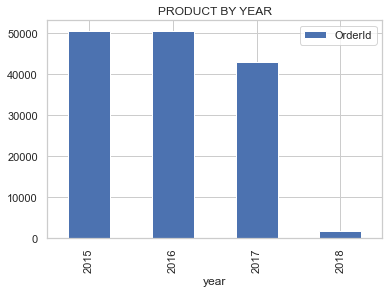

In [84]:
profit_orders.groupby('year').agg({'OrderId':'count'}).plot(kind='bar')
plt.title('PRODUCT BY YEAR')
plt.savefig('PRODUCT BY YEAR.png')
plt.show()

### 8. Order profit per order  by time (by each week, month, year, quarter)

In [85]:
sales_inventory.groupby('week').agg({'OrderProfitPerOrder':'sum'})

OrderProfitPerOrder
week                     
1            92037.640254
2            75680.460163
3            74293.699870
4            72440.370232
5            84926.320370
6            83214.700180
7            61892.830302
8            76089.980144
9            82736.900161
10           62933.530158
11           65908.390260
12           83286.940264
13           84364.210016
14           78000.740090
15           78349.599966
16           83686.780154
17           77757.769773
18           78697.729911
19           71230.940119
20           72615.730148
21           72446.320007
22           84864.530157
23           81626.970136
24           78518.710236
25           77275.050220
26           62823.930167
27           81727.789996
28           78156.150048
29           87436.579998
30           70621.879872
31           80784.790057
32           78665.190171
33           84340.080072
34           85682.770231
35           76607.030206
36           84160.629993
37           84292.750000
38           86229.119914
39           86860.470257
40           41711.780176
41           71956.899827
42           64889.159919
43          102150.349782
44           78974.190341
45           65602.660032
46           71229.760316
47           64663.089832
48           65695.649932
49           50799.510097
50           58408.419677
51           76645.789855
52           65165.360103
53           25744.349891

In [86]:
sales_inventory.groupby('month').agg({'OrderProfitPerOrder':'sum'})

OrderProfitPerOrder
month                         
April            339021.360056
August           360210.470630
December         281481.869563
February         301061.220935
January          367127.430615
July             348592.480100
June             324742.520726
March            333727.100652
May              337878.660269
November         281757.810287
October          331987.009971
September        359315.040248

In [87]:
sales_inventory.groupby('quarter').agg({'OrderProfitPerOrder':'sum'})

OrderProfitPerOrder
quarter                     
1               1.001916e+06
2               1.001643e+06
3               1.068118e+06
4               8.952267e+05

In [88]:
sales_inventory.groupby('year').agg({'OrderProfitPerOrder':'sum'})

OrderProfitPerOrder
year                     
2015         1.318857e+06
2016         1.310119e+06
2017         1.304085e+06
2018         3.384189e+04

### 9. Order count by country/state/  by time (by each week, month, year, quarter)

In [89]:
sales_inventory.groupby(['week','CustomerCountry','CustomerState']).agg({'OrderId':'count'})

OrderId
week CustomerCountry CustomerState         
1    EE. UU.         AL                   4
                     AR                   2
                     AZ                  71
                     CA                 527
                     CO                  56
...                                     ...
53   EE. UU.         VA                  13
                     WA                   4
                     WI                   4
                     WV                   3
     Puerto Rico     PR                 375

[2150 rows x 1 columns]

In [90]:
sales_inventory.groupby(['month','CustomerCountry','CustomerState']).agg({'OrderId':'count'})

OrderId
month     CustomerCountry CustomerState         
April     EE. UU.         AL                  10
                          AR                   4
                          AZ                 291
                          CA                2423
                          CO                 161
...                                          ...
September EE. UU.         VA                 139
                          WA                  87
                          WI                  65
                          WV                  12
          Puerto Rico     PR                6032

[525 rows x 1 columns]

In [91]:
sales_inventory.groupby(['quarter','CustomerCountry','CustomerState']).agg({'OrderId':'count'})

OrderId
quarter CustomerCountry CustomerState         
1       EE. UU.         AL                   4
                        AR                  69
                        AZ                 845
                        CA                8032
                        CO                 503
...                                        ...
4       EE. UU.         VA                 427
                        WA                 218
                        WI                 184
                        WV                  68
        Puerto Rico     PR               14564

[178 rows x 1 columns]

In [92]:
sales_inventory.groupby(['year','CustomerCountry','CustomerState']).agg({'OrderId':'count'})

OrderId
year CustomerCountry CustomerState         
2015 EE. UU.         AL                   2
                     AR                  61
                     AZ                1044
                     CA               10209
                     CO                 688
...                                     ...
2018 EE. UU.         VA                  24
                     WA                  10
                     WI                   5
                     WV                   2
     Puerto Rico     PR                 807

[177 rows x 1 columns]

### 10. Inventory Units by each class or cluster

In [93]:
sales_inventory.groupby('Class').agg({'currentstock':'sum'})

currentstock
Class                                       
High Value-Small Number             13399842
Moderate Value-Moderate Number       6059123
Small Value-Large Number            10919162

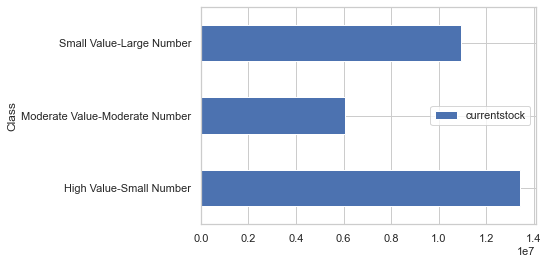

In [94]:
sales_inventory.groupby('Class').agg({'currentstock':'sum'}).plot(kind='barh')
plt.show()

### 11. Inventory Value by each class or cluster

In [95]:
sales_inventory['Inventory_Value'] = sales_inventory['currentstock'] * sales_inventory['ProductPrice']

In [96]:
sales_inventory.groupby('Class').agg({'Inventory_Value':'sum'})

Inventory_Value
Class                                          
High Value-Small Number            1.387021e+09
Moderate Value-Moderate Number     5.615272e+08
Small Value-Large Number           5.876127e+08

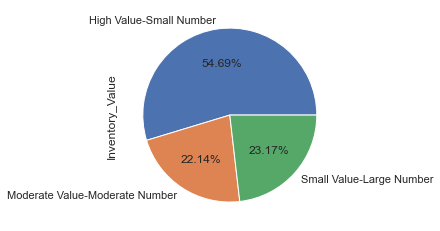

In [97]:
sales_inventory.groupby('Class').agg({'Inventory_Value':'sum'}).plot(kind='pie',subplots=True,legend=False,autopct='%.2f%%')
plt.show()

### 12. Inventory by class

In [98]:
sales_inventory.groupby('Class').agg({'currentstock':'count'})

currentstock
Class                                       
High Value-Small Number                67738
Moderate Value-Moderate Number         58781
Small Value-Large Number               54000

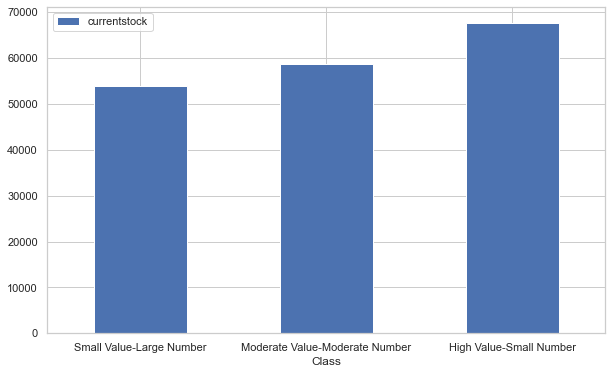

In [99]:
sales_inventory.groupby('Class').agg({'currentstock':'count'}).sort_values(by='currentstock').plot(kind='bar',rot=0,figsize=(10,6))
plt.show()

### 13. Detail Stock Action (products to be ordered, not required to ordered)

#####  products to be ordered

In [100]:
to_order = sales_inventory[sales_inventory['currentstock'] <= sales_inventory['reorderpoint']]

to_order.groupby(by=['productid','productname']).agg({'currentstock':np.mean, 'reorderpoint': np.mean})

currentstock  \
productid productname                                                   
24        Elevation Training Mask 2.0                           175.0   
44        adidas Men's F10 Messi TRX FG Soccer Cleat            175.0   
58        Diamondback Boys' Insight 24 Performance Hybr          35.0   
60        SOLE E25 Elliptical                                    35.0   
78        Nike Kids' Grade School KD VI Basketball Shoe         175.0   
116       Nike Men's Comfort 2 Slide                            175.0   
134       Nike Women's Legend V-Neck T-Shirt                    175.0   
172       Nike Women's Tempo Shorts                             175.0   
208       SOLE E35 Elliptical                                    35.0   
216       Yakima DoubleDown Ace Hitch Mount 4-Bike Rack          35.0   
226       Bowflex SelectTech 1090 Dumbbells                      35.0   
258       Nike Women's Free 5.0 TR FIT PRT 4 Training S         175.0   
276       Under Armour Women's Ignite Slide                     175.0   
278       Under Armour Men's Compression EV SL Slide            175.0   
282       Under Armour Women's Ignite PIP VI Slide              175.0   
306       Polar FT4 Heart Rate Monitor                          175.0   
364       Total Gym 1400                                         35.0   
502       Nike Men's Dri-FIT Victory Golf Polo                  175.0   
564       Nike Men's Deutschland Weltmeister Winners Bl         175.0   
572       TYR Boys' Team Digi Jammer                            175.0   
642       Columbia Men's PFG Anchor Tough T-Shirt               175.0   
646       Merrell Women's Grassbow Sport Hiking Shoe            175.0   
652       Merrell Women's Grassbow Sport Waterproof Hik          35.0   
666       Merrell Men's All Out Flash Trail Running Sho          35.0   
724       LIJA Women's Mid-Length Panel Golf Shorts             175.0   
728       LIJA Women's Eyelet Sleeveless Golf Polo              175.0   
730       LIJA Women's Argyle Golf Polo                         175.0   
768       Titleist Club Glove Travel Cover                       35.0   
778       Bag Boy Beverage Holder                               175.0   
786       TaylorMade 2014 Purelite Stand Bag                     35.0   
792       Hirzl Men's Hybrid Golf Glove                         175.0   
804       Glove It Women's Imperial Golf Glove                  175.0   
810       Glove It Women's Mod Oval Golf Glove                  175.0   
818       Titleist Pro V1x Golf Balls                           175.0   
822       Titleist Pro V1x High Numbers Golf Balls              175.0   
828       Bridgestone e6 Straight Distance NFL San Dieg         175.0   
858       GolfBuddy VT3 GPS Watch                                35.0   
860       Bushnell Pro X7 Jolt Slope Rangefinder                 35.0   
886       Team Golf San Francisco Giants Putter Grip            175.0   
906       Team Golf Tennessee Volunteers Putter Grip            175.0   
924       Glove It Urban Brick Golf Towel                       175.0   
926       Glove It Imperial Golf Towel                          175.0   
982       insta-bed Neverflat Air Mattress                       35.0   
1004      Field & Stream Sportsman 16 Gun Fire Safe              35.0   
1014      O'Brien Men's Neoprene Life Vest                      175.0   
1346      Sports Books                                           35.0   
1348      CDs of rock                                            35.0   
1350      Children's heaters                                     35.0   
1352      Industrial consumer electronics                        35.0   
1354      DVDs                                                   35.0   
1356      First aid kit                                          35.0   
1358      Rock music                                             35.0   
1360      Smart watch                                            35.0   
1362      Fighting video games            

##### products not required to be ordered

In [101]:

not_to_order = sales_inventory[sales_inventory['currentstock'] > sales_inventory['reorderpoint']]
not_to_order.groupby(['productid','productname']).agg({'currentstock':np.mean, 'reorderpoint': np.mean})

currentstock  \
productid productname                                                   
19        Nike Men's Fingertrap Max Training Shoe                69.0   
35        adidas Brazuca 2014 Official Match Ball                65.0   
37        adidas Kids' F5 Messi FG Soccer Cleat                 328.0   
61        Diamondback Girls' Clarity 24 Hybrid Bike 201          61.0   
93        Under Armour Men's Tech II T-Shirt                    324.0   
...                                                               ...   
1355      Lawn mower                                             65.0   
1357      Men's gala suit                                        67.0   
1359      Adult dog supplies                                     69.0   
1361      Toys                                                   61.0   
1363      Summer dresses                                         63.0   

                                                         reorderpoint  
productid productname                                                  
19        Nike Men's Fingertrap Max Training Shoe                35.0  
35        adidas Brazuca 2014 Official Match Ball                35.0  
37        adidas Kids' F5 Messi FG Soccer Cleat                 175.0  
61        Diamondback Girls' Clarity 24 Hybrid Bike 201          35.0  
93        Under Armour Men's Tech II T-Shirt                    175.0  
...                                                               ...  
1355      Lawn mower                                             35.0  
1357      Men's gala suit                                        35.0  
1359      Adult dog supplies                                     35.0  
1361      Toys                                                   35.0  
1363      Summer dresses                                         35.0  

[64 rows x 2 columns]

#### 14. Product Order qty trend  (by time (by each week, month, year, quarter))

In [102]:
sales_inventory.groupby(['week', 'productid', 'productname']).agg({'OrderItemQuantity':'sum'})

OrderItemQuantity
week productid productname                                                     
1    37        adidas Kids' F5 Messi FG Soccer Cleat                         14
     44        adidas Men's F10 Messi TRX FG Soccer Cleat                    11
     93        Under Armour Men's Tech II T-Shirt                            15
     116       Nike Men's Comfort 2 Slide                                    22
     134       Nike Women's Legend V-Neck T-Shirt                            27
...                                                                         ...
53   957       Diamondback Women's Serene Classic Comfort Bi                108
     977       ENO Atlas Hammock Straps                                       9
     1004      Field & Stream Sportsman 16 Gun Fire Safe                    110
     1014      O'Brien Men's Neoprene Life Vest                             426
     1073      Pelican Sunstream 100 Kayak                                  102

[3599 rows x 1 columns]

In [103]:
sales_inventory.groupby(['month', 'productid', 'productname']).agg({'OrderItemQuantity':'sum'})

OrderItemQuantity
month     productid productname                                                  
April     19        Nike Men's Fingertrap Max Training Shoe                     2
          24        Elevation Training Mask 2.0                                12
          35        adidas Brazuca 2014 Official Match Ball                     5
          37        adidas Kids' F5 Messi FG Soccer Cleat                      84
          44        adidas Men's F10 Messi TRX FG Soccer Cleat                110
...                                                                           ...
September 982       insta-bed Neverflat Air Mattress                            2
          1004      Field & Stream Sportsman 16 Gun Fire Safe                1582
          1014      O'Brien Men's Neoprene Life Vest                         5143
          1059      Pelican Maverick 100X Kayak                                40
          1073      Pelican Sunstream 100 Kayak                              1381

[900 rows x 1 columns]

In [104]:
sales_inventory.groupby(['quarter', 'productid', 'productname']).agg({'OrderItemQuantity':'sum'})

OrderItemQuantity
quarter productid productname                                                  
1       37        adidas Kids' F5 Messi FG Soccer Cleat                     242
        44        adidas Men's F10 Messi TRX FG Soccer Cleat                310
        93        Under Armour Men's Tech II T-Shirt                        284
        116       Nike Men's Comfort 2 Slide                                332
        134       Nike Women's Legend V-Neck T-Shirt                        218
...                                                                         ...
4       1359      Adult dog supplies                                        246
        1360      Smart watch                                               145
        1361      Toys                                                      253
        1362      Fighting video games                                      228
        1363      Summer dresses                                            272

[327 rows x 1 columns]

In [105]:
sales_inventory.groupby(['year', 'productid', 'productname']).agg({'OrderItemQuantity':'sum'})

OrderItemQuantity
year productid productname                                                  
2015 37        adidas Kids' F5 Messi FG Soccer Cleat                     304
     44        adidas Men's F10 Messi TRX FG Soccer Cleat                406
     93        Under Armour Men's Tech II T-Shirt                        348
     116       Nike Men's Comfort 2 Slide                                415
     134       Nike Women's Legend V-Neck T-Shirt                        381
...                                                                      ...
2018 1359      Adult dog supplies                                        246
     1360      Smart watch                                               212
     1361      Toys                                                      276
     1362      Fighting video games                                      610
     1363      Summer dresses                                            378

[236 rows x 1 columns]

### 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

In [106]:
top10_prod = sales_inventory.groupby(['productname']).agg({'OrderItemQuantity':'sum'}).sort_values(by='OrderItemQuantity',ascending=False).head(10)

top10_prod


OrderItemQuantity
productname                                                     
Perfect Fitness Perfect Rip Deck                           73698
Nike Men's Dri-FIT Victory Golf Polo                       62956
O'Brien Men's Neoprene Life Vest                           57803
Nike Men's Free 5.0+ Running Shoe                          36680
Under Armour Girls' Toddler Spine Surge Runni              31735
Nike Men's CJ Elite 2 TD Football Cleat                    22246
Field & Stream Sportsman 16 Gun Fire Safe                  17325
Pelican Sunstream 100 Kayak                                15500
Diamondback Women's Serene Classic Comfort Bi              13729
ENO Atlas Hammock Straps                                     998

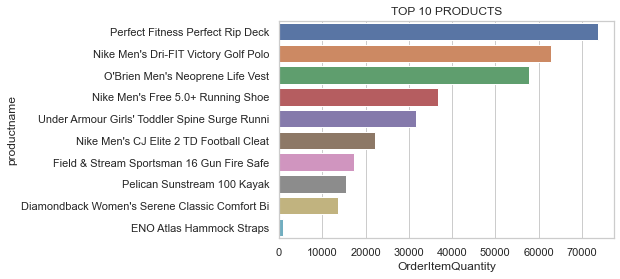

In [107]:
sns.barplot(top10_prod,y=top10_prod.index,x=top10_prod.OrderItemQuantity)
plt.title('TOP 10 PRODUCTS')
plt.show()

In [108]:
top10_cat = sales_inventory.groupby(['CategoryName']).agg({'OrderItemQuantity':'sum'}).sort_values(by='OrderItemQuantity',ascending=False).head(10)

top10_cat

OrderItemQuantity
CategoryName                           
Cleats                            73734
Women's Apparel                   62956
Indoor/Outdoor Games              57803
Cardio Equipment                  37587
Shop By Sport                     32726
Men's Footwear                    22246
Fishing                           17325
Water Sports                      15540
Camping & Hiking                  13729
Electronics                        9436

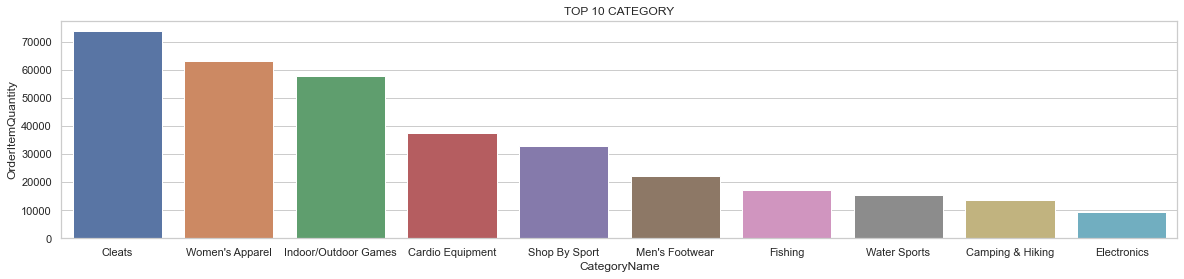

In [109]:
plt.figure(figsize=(20,4))
sns.barplot(top10_prod,x=top10_cat.index,y=top10_cat.OrderItemQuantity)
plt.title('TOP 10 CATEGORY')
plt.show()

In [110]:
# Top 10 cities interms of revenue
top10_city_rev = sales_inventory.groupby(['CustomerCity']).agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False).head(10)

top10_city_rev


Sales
CustomerCity              
Caguas        1.361027e+07
Chicago       7.976142e+05
Los Angeles   6.978874e+05
Brooklyn      6.764198e+05
New York      3.612171e+05
Philadelphia  3.157055e+05
Bronx         3.089050e+05
San Diego     2.938305e+05
Miami         2.703682e+05
Houston       2.673479e+05

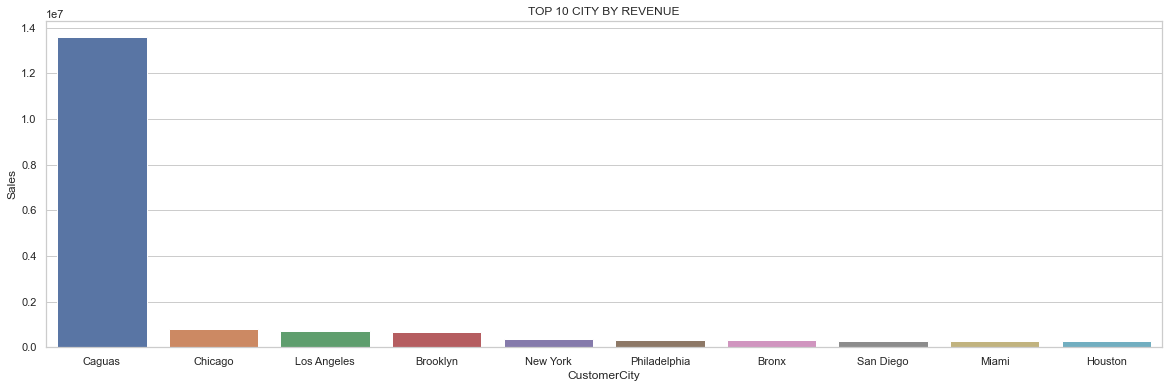

In [111]:
plt.figure(figsize=(20,6))
sns.barplot(top10_city_rev,x=top10_city_rev.index,y=top10_city_rev.Sales)
plt.title('TOP 10 CITY BY REVENUE')
plt.show()

In [112]:
# Top 10 cities interms of sale units (quantity)
top10_city_unit = sales_inventory.groupby(['CustomerCity']).agg({'OrderItemQuantity':'sum'}).sort_values(by='OrderItemQuantity',ascending=False).head(10)
top10_city_unit

OrderItemQuantity
CustomerCity                   
Caguas                   142319
Chicago                    8226
Los Angeles                7252
Brooklyn                   7251
New York                   3862
Philadelphia               3399
Bronx                      3204
San Diego                  3084
Houston                    2787
Miami                      2751

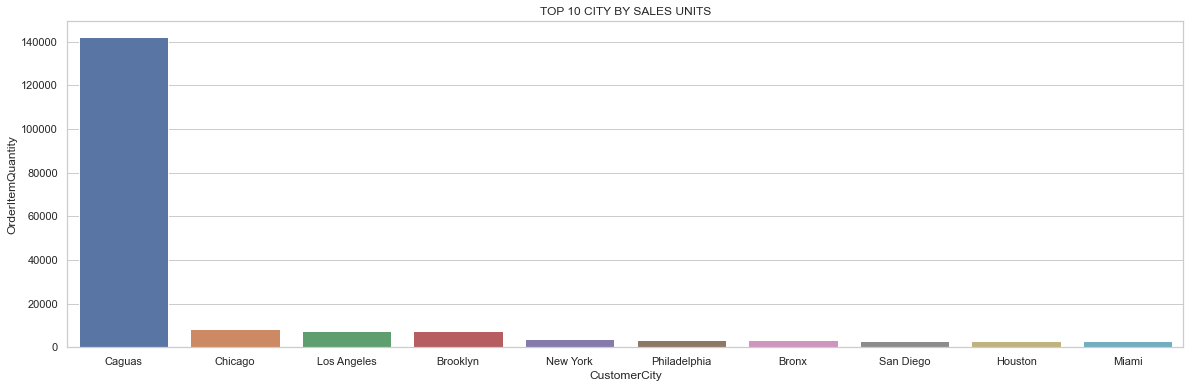

In [113]:
plt.figure(figsize=(20,6))
sns.barplot(top10_city_unit,x=top10_city_unit.index,y=top10_city_unit.OrderItemQuantity)
plt.title('TOP 10 CITY BY SALES UNITS')
plt.show()

### 16. Top payment methods by each product category.

In [114]:
top_pay = pd.DataFrame(sales_inventory.groupby(['Type','CategoryName'])['OrderId'].count().unstack().idxmax())
top_pay.rename(columns={0:'Payment Method'},inplace=True)

In [115]:
top_pay

Payment Method
CategoryName                       
Accessories                   DEBIT
As Seen on  TV!               DEBIT
Baby                          DEBIT
Baseball & Softball           DEBIT
Basketball                 TRANSFER
Books                         DEBIT
Boxing & MMA                  DEBIT
CDs                           DEBIT
Cameras                       DEBIT
Camping & Hiking              DEBIT
Cardio Equipment              DEBIT
Children's Clothing           DEBIT
Cleats                        DEBIT
Computers                     DEBIT
Consumer Electronics          DEBIT
Crafts                        DEBIT
DVDs                          DEBIT
Electronics                   DEBIT
Fishing                       DEBIT
Fitness Accessories           DEBIT
Garden                        DEBIT
Girls' Apparel                DEBIT
Golf Apparel                  DEBIT
Golf Bags & Carts             DEBIT
Golf Balls                    DEBIT
Golf Gloves                   DEBIT
Golf Shoes                    DEBIT
Health and Beauty             DEBIT
Hockey                        DEBIT
Hunting & Shooting            DEBIT
Indoor/Outdoor Games          DEBIT
Kids' Golf Clubs              DEBIT
Lacrosse                      DEBIT
Men's Clothing                DEBIT
Men's Footwear                DEBIT
Men's Golf Clubs              DEBIT
Music                         DEBIT
Pet Supplies                  DEBIT
Shop By Sport                 DEBIT
Soccer                        DEBIT
Sporting Goods                DEBIT
Strength Training             DEBIT
Tennis & Racquet              DEBIT
Toys                          DEBIT
Trade-In                      DEBIT
Video Games                   DEBIT
Water Sports                  DEBIT
Women's Apparel               DEBIT
Women's Clothing              DEBIT
Women's Golf Clubs            DEBIT

### 17. Which shipping mode is more efficient interms of not delaying?

In [116]:
not_delayed = sales_inventory[sales_inventory.LateDeliveryRisk=='Not Late']


In [117]:
not_delayed.groupby('ShippingMode').agg({'OrderId':'count'}).sort_values(by='OrderId',ascending=False).head(1)

OrderId
ShippingMode           
Standard Class    64386

### 18. Number of orders, sales, qty  by order status

In [118]:
sales_inventory.groupby('OrderStatus').agg({'OrderId':'count','Sales':'sum','OrderItemQuantity':'count'})

OrderId         Sales  OrderItemQuantity
OrderStatus                                              
Canceled            3692  7.443704e+05               3692
Closed             19616  4.022624e+06              19616
Complete           59491  1.209531e+07              59491
On Hold             9804  1.981543e+06               9804
Payment Review      1893  3.836537e+05               1893
Pending            20227  4.120533e+06              20227
Pending Payment    39832  8.106698e+06              39832
Processing         21902  4.504064e+06              21902
Suspected Fraud     4062  8.259350e+05               4062

### 19. Which categories are most profitable categories (top5)?

In [119]:
topprofit_cat = sales_inventory.groupby('CategoryName').agg({'Benefitperorder':'sum'}).sort_values(by='Benefitperorder',ascending=False).head(5)
topprofit_cat

Benefitperorder
CategoryName                     
Fishing             756220.767190
Cleats              494636.919791
Camping & Hiking    427455.568106
Cardio Equipment    383011.098485
Women's Apparel     350421.029567

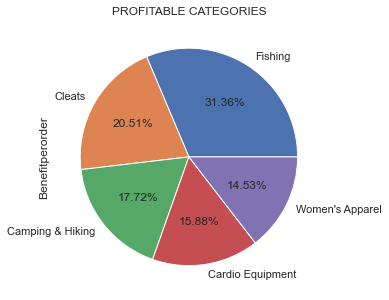

In [120]:
topprofit_cat.plot(kind='pie',subplots=True,autopct='%.2f%%',legend=False,figsize=(10,5))
plt.title('PROFITABLE CATEGORIES')
plt.show()

### 20. Which categoires have been given highest average discount (top5)?

In [121]:
sales_inventory.groupby('CategoryName').agg({'OrderItemDiscountRate':'mean'}).sort_values(by='OrderItemDiscountRate',ascending=False).head()


OrderItemDiscountRate
CategoryName                             
As Seen on  TV!                  0.109412
Golf Shoes                       0.105611
Strength Training                0.105045
Hunting & Shooting               0.104705
Baby                             0.104300

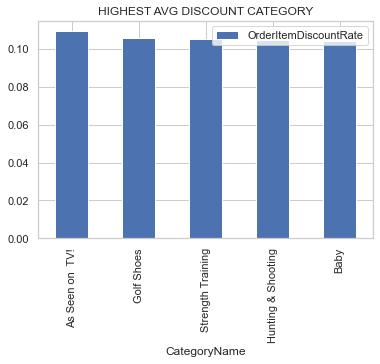

In [122]:
sales_inventory.groupby('CategoryName').agg({'OrderItemDiscountRate':'mean'}).sort_values(by='OrderItemDiscountRate',ascending=False).head().plot(kind='bar')
plt.title('HIGHEST AVG DISCOUNT CATEGORY')
plt.show()

### 21. Any other analysis you can perform? (At least 5 additional analysis you required to work on beyond the supported questions)

### a. Values of Sales , Qty and Profit by Customer Segement.

In [123]:
data1 = sales_inventory.groupby('CustomerSegment').agg({'Sales':'sum','OrderItemQuantity':'sum','Benefitperorder':'sum'})
data1

Sales  OrderItemQuantity  Benefitperorder
CustomerSegment                                                  
Consumer         1.909579e+07             199234     2.073488e+06
Corporate        1.116841e+07             116560     1.202575e+06
Home Office      6.520538e+06              68285     6.908403e+05

### b. Department wise Avg Qty and Avg Profit per order.

In [124]:
data2 = sales_inventory.groupby('DepartmentName').agg({'OrderItemQuantity':'sum','OrderProfitPerOrder':'sum'})
data2

OrderItemQuantity  OrderProfitPerOrder
DepartmentName                                           
Apparel                        98181         8.818829e+05
Book Shop                        405         8.830100e+02
Discs Shop                      2026         2.419312e+04
Fan Shop                      106165         1.834155e+06
Fitness                         6227         4.653806e+04
Footwear                       43400         4.102225e+05
Golf                           99297         4.975236e+05
Health and Beauty                362         9.493630e+03
Outdoors                       26059         1.452515e+05
Pet Shop                         492         3.589260e+03
Technology                      1465         1.131700e+05

### c. Avg Sales and Avg Qty by Order Region.

In [125]:
data3=sales_inventory.groupby('OrderRegion').agg({'Sales':'mean','OrderItemQuantity':'mean'})
data3

Sales  OrderItemQuantity
OrderRegion                                   
Canada           194.849889           2.276330
Caribbean        198.487537           2.188507
Central Africa   195.147893           2.206321
Central America  199.912216           2.190854
Central Asia     198.625556           2.195298
East Africa      203.150593           2.185745
East of USA      198.280837           2.184816
Eastern Asia     204.176008           1.972390
Eastern Europe   197.516981           2.246429
North Africa     196.396108           2.213800
Northern Europe  220.162444           2.083538
Oceania          198.724300           2.013205
South America    198.251182           2.185939
South Asia       200.967652           2.020955
South of  USA    194.260555           2.176514
Southeast Asia   202.588905           1.974526
Southern Africa  197.278820           2.166811
Southern Europe  217.147579           2.070406
US Center        195.575976           2.203839
West Africa      196.956492           2.216721
West Asia        195.485403           2.199700
West of USA      196.599019           2.195296
Western Europe   217.432615           2.084326

### d. Quarter wise Avg Sales/Qty/Profit

In [126]:
data4=sales_inventory.groupby('quarter').agg({'Sales':'mean','OrderItemQuantity':'mean','OrderProfitPerOrder':'mean'})
data4

Sales  OrderItemQuantity  OrderProfitPerOrder
quarter                                                    
1        195.602571           2.158692            20.689197
2        199.753226           2.161697            21.517563
3        201.587242           2.157196            22.570800
4        221.723845           2.010204            23.423603

### e. Top 10 products with Late Delivery Risk

In [127]:
data5=sales_inventory.groupby('ProductName').agg({'LateDeliveryRisk':lambda x:(x=='Late').sum()}).sort_values(by='LateDeliveryRisk',ascending=False).head(10)
data5

LateDeliveryRisk
ProductName                                                    
Perfect Fitness Perfect Rip Deck                           5806
Nike Men's CJ Elite 2 TD Football Cleat                    5337
Nike Men's Dri-FIT Victory Golf Polo                       5074
O'Brien Men's Neoprene Life Vest                           4645
Field & Stream Sportsman 16 Gun Fire Safe                  4201
Pelican Sunstream 100 Kayak                                3683
Diamondback Women's Serene Classic Comfort Bi              3281
Nike Men's Free 5.0+ Running Shoe                          2971
Under Armour Girls' Toddler Spine Surge Runni              2549
Fighting video games                                        200

## D. CREATE VISUALIZATION FOR ANALYSIS. 

### ORDERS AND DELIVERY ANALYSIS .

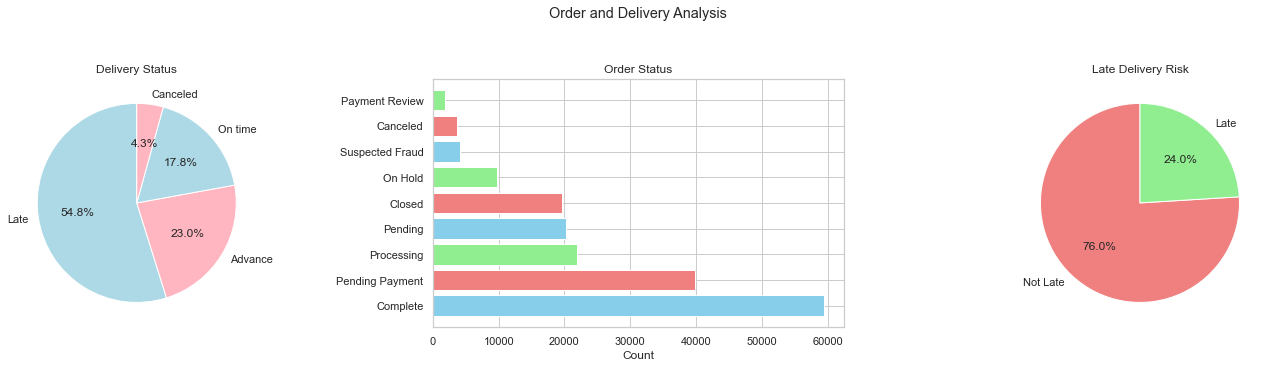

In [128]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Order and Delivery Analysis', y=1.02)

# Pie Chart: Delivery Status
delivery_status_counts = sales_inventory['DeliveryStatus'].value_counts()
axes[0].pie(delivery_status_counts, labels=delivery_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink'])
axes[0].set_title('Delivery Status')

# Bar Chart: Order Status
order_status_counts = sales_inventory['OrderStatus'].value_counts()
axes[1].barh(order_status_counts.index, order_status_counts, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Order Status')
axes[1].set_xlabel('Count')

# Pie Chart: Late Delivery Risk
late_delivery_risk_counts = sales_inventory['LateDeliveryRisk'].value_counts()
axes[2].pie(late_delivery_risk_counts, labels=late_delivery_risk_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axes[2].set_title('Late Delivery Risk')


# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### TRENDS ANALYSIS.

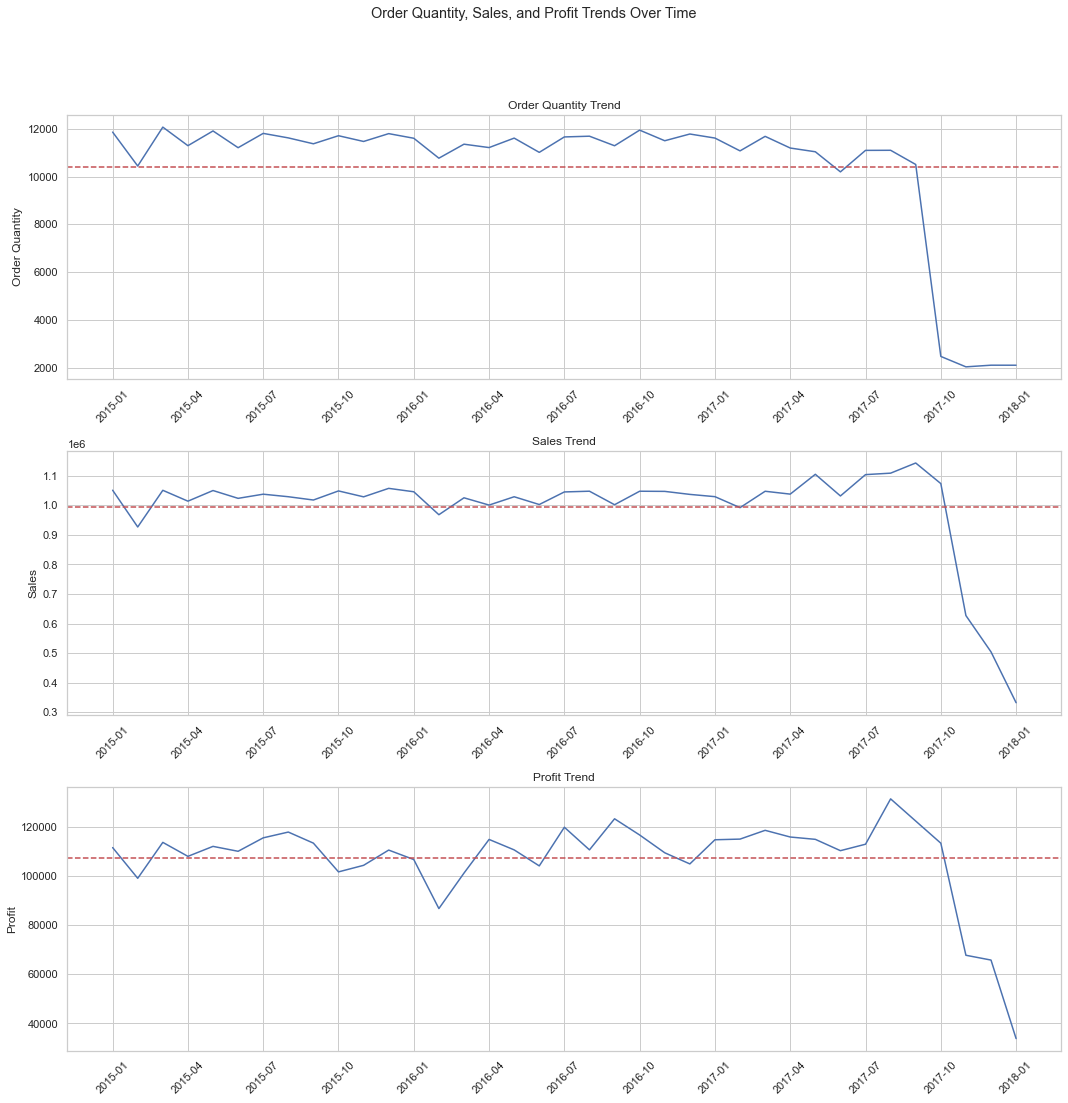

In [129]:
# Set up the style for seaborn plots
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
fig.suptitle('Order Quantity, Sales, and Profit Trends Over Time', y=1.02)

# Line Chart 1: Order Quantity Trend
OOT = sales_inventory.groupby(sales_inventory.orderdateDateOrders.dt.strftime("%Y-%m"))['OrderItemQuantity'].sum().reset_index()
sns.lineplot(x='orderdateDateOrders', y='OrderItemQuantity', data=OOT, ax=axes[0])
axes[0].axhline(y=OOT['OrderItemQuantity'].mean(), color='r', linestyle='--', label='Average Orders')
axes[0].set_title('Order Quantity Trend')
axes[0].set_ylabel('Order Quantity')
axes[0].set_xlabel("")

axes[0].set_xticks(range(0, len(OOT['orderdateDateOrders']), 3))  # Set ticks every 3 months
axes[0].set_xticklabels(OOT['orderdateDateOrders'][::3], rotation=45)  # Set labels to show every 3 months with a 45-degree rotation

# Line Chart 2: Sales Trend
ST = sales_inventory.groupby(sales_inventory['orderdateDateOrders'].dt.strftime("%Y-%m"))['Sales'].sum().reset_index()
sns.lineplot(x='orderdateDateOrders', y='Sales', data=ST, ax=axes[1])
axes[1].axhline(y=ST['Sales'].mean(), color='r', linestyle='--', label='Average Sales')
axes[1].set_title('Sales Trend')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel("")
 
axes[1].set_xticks(range(0, len(ST['orderdateDateOrders']), 3))  # Set ticks every 3 months
axes[1].set_xticklabels(ST['orderdateDateOrders'][::3], rotation=45)  # Set labels to show every 3 months with a 45-degree rotation

# Line Chart 3: Profit Trend
PT = sales_inventory.groupby(sales_inventory['orderdateDateOrders'].dt.strftime("%Y-%m"))['OrderProfitPerOrder'].sum().reset_index()
sns.lineplot(x='orderdateDateOrders', y='OrderProfitPerOrder', data=PT, ax=axes[2])
axes[2].axhline(y=PT['OrderProfitPerOrder'].mean(), color='r', linestyle='--', label='Average Profit')
axes[2].set_title('Profit Trend')
axes[2].set_ylabel('Profit')
axes[2].set_xlabel("") 

# Set x-ticks
axes[2].set_xticks(range(0, len(PT['orderdateDateOrders']), 3))  # Set ticks every 3 months
axes[2].set_xticklabels(PT['orderdateDateOrders'][::3], rotation=45)  # Set labels to show every 3 months with a 45-degree rotation


# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 1. CUSTOMER SEGMENT ANALYSIS .

In [130]:
data1

Sales  OrderItemQuantity  Benefitperorder
CustomerSegment                                                  
Consumer         1.909579e+07             199234     2.073488e+06
Corporate        1.116841e+07             116560     1.202575e+06
Home Office      6.520538e+06              68285     6.908403e+05

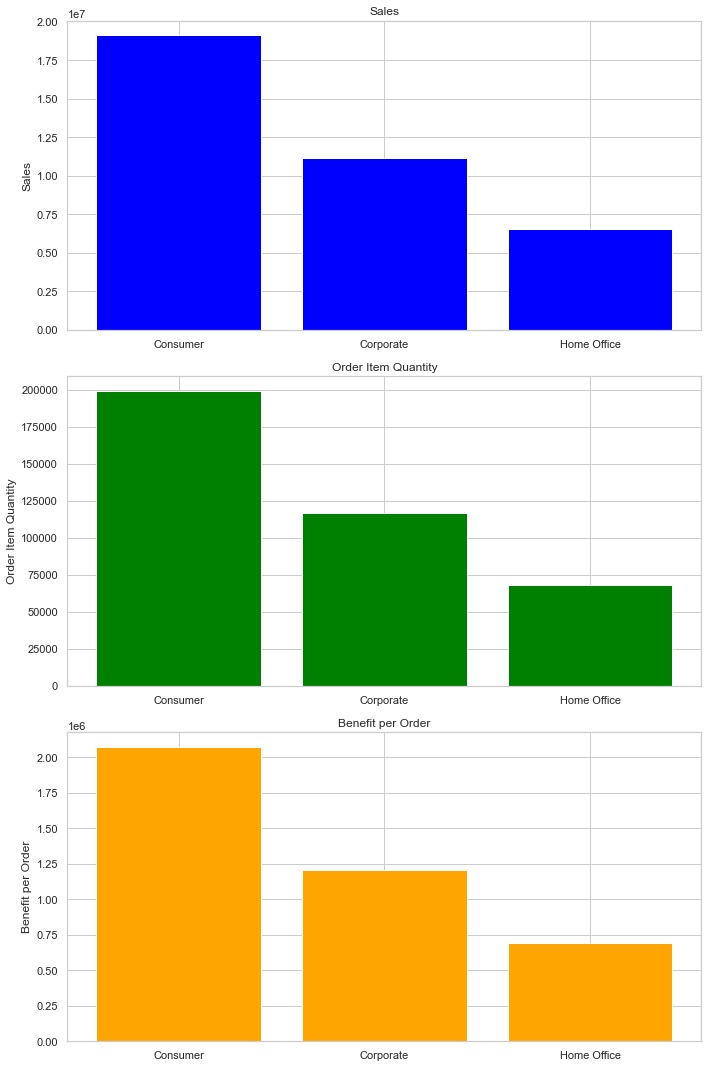

In [131]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot Sales
axes[0].bar(data1.index,data1.Sales, color='blue')
axes[0].set_title('Sales')
axes[0].set_ylabel('Sales')

# Plot Order Item Quantity
axes[1].bar(data1.index,data1.OrderItemQuantity, color='green')
axes[1].set_title('Order Item Quantity')
axes[1].set_ylabel('Order Item Quantity')

# Plot Benefit per Order
axes[2].bar(data1.index,data1.Benefitperorder,color='orange')
axes[2].set_title('Benefit per Order')
axes[2].set_ylabel('Benefit per Order')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 2. DEPARTMENT ANALYSIS 

In [132]:
data2

OrderItemQuantity  OrderProfitPerOrder
DepartmentName                                           
Apparel                        98181         8.818829e+05
Book Shop                        405         8.830100e+02
Discs Shop                      2026         2.419312e+04
Fan Shop                      106165         1.834155e+06
Fitness                         6227         4.653806e+04
Footwear                       43400         4.102225e+05
Golf                           99297         4.975236e+05
Health and Beauty                362         9.493630e+03
Outdoors                       26059         1.452515e+05
Pet Shop                         492         3.589260e+03
Technology                      1465         1.131700e+05

<ipython-input-133-2e0cf943618f>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



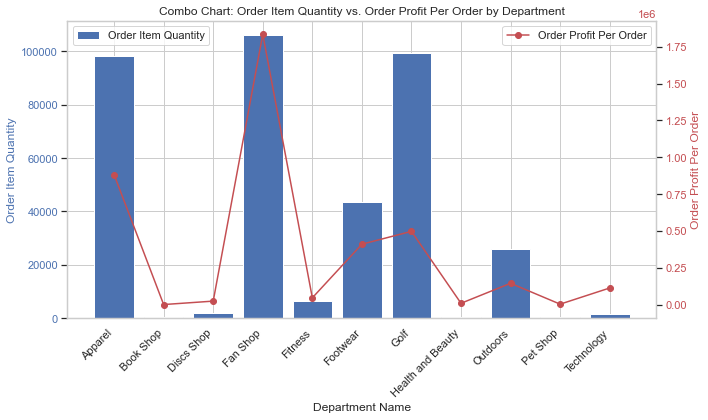

In [133]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first variable (bars)
ax1.bar(data2.index, data2.OrderItemQuantity, color='b', label='Order Item Quantity')
ax1.set_xlabel('Department Name')
ax1.set_ylabel('Order Item Quantity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(data2.index, rotation=45, ha='right')

# Create a secondary y-axis and plot the second variable (line plot)
ax2 = ax1.twinx()
ax2.plot(data2.index, data2.OrderProfitPerOrder, color='r', marker='o', label='Order Profit Per Order')
ax2.set_ylabel('Order Profit Per Order', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title
plt.title('Combo Chart: Order Item Quantity vs. Order Profit Per Order by Department')
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


### 3. QUATERLY ANALYSIS

In [134]:
data4

Sales  OrderItemQuantity  OrderProfitPerOrder
quarter                                                    
1        195.602571           2.158692            20.689197
2        199.753226           2.161697            21.517563
3        201.587242           2.157196            22.570800
4        221.723845           2.010204            23.423603

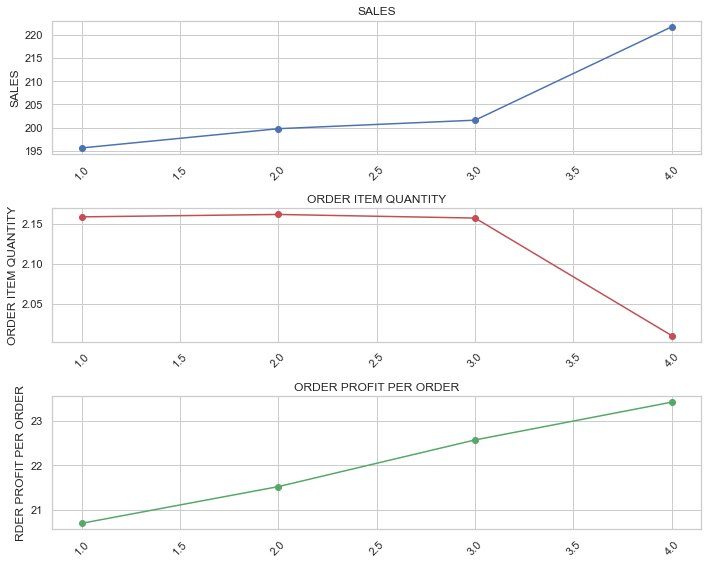

In [135]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Plot Order Item Quantity.
axs[0].plot(data4.index,data4.Sales, marker='o', color='b')
axs[0].set_title('SALES')
axs[0].set_ylabel('SALES')
axs[0].tick_params(axis='x', rotation=45)

# Plot Order Item Quantity.
axs[1].plot(data4.index,data4.OrderItemQuantity ,marker='o', color='r')
axs[1].set_title('ORDER ITEM QUANTITY')
axs[1].set_ylabel('ORDER ITEM QUANTITY')
axs[1].tick_params(axis='x', rotation=45)


# Plot Order Profit Per Order.
axs[2].plot(data4.index,data4.OrderProfitPerOrder, marker='o', color='g')
axs[2].set_title('ORDER PROFIT PER ORDER')
axs[2].set_ylabel('RDER PROFIT PER ORDER')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### 4. LATE DELIVERY PRODUCTS .

In [136]:
data5

LateDeliveryRisk
ProductName                                                    
Perfect Fitness Perfect Rip Deck                           5806
Nike Men's CJ Elite 2 TD Football Cleat                    5337
Nike Men's Dri-FIT Victory Golf Polo                       5074
O'Brien Men's Neoprene Life Vest                           4645
Field & Stream Sportsman 16 Gun Fire Safe                  4201
Pelican Sunstream 100 Kayak                                3683
Diamondback Women's Serene Classic Comfort Bi              3281
Nike Men's Free 5.0+ Running Shoe                          2971
Under Armour Girls' Toddler Spine Surge Runni              2549
Fighting video games                                        200

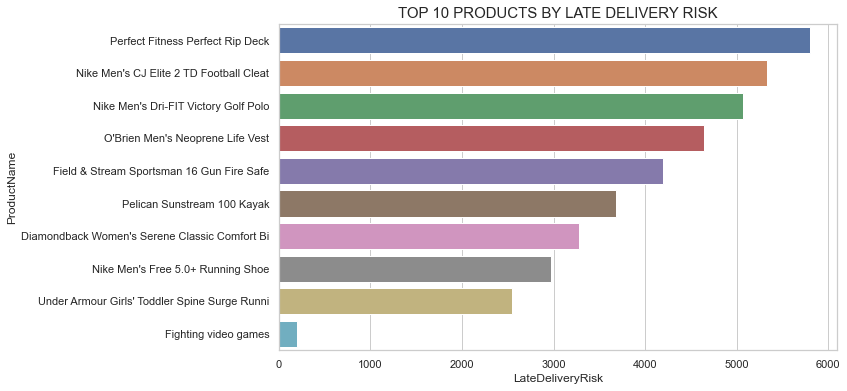

In [137]:
plt.figure(figsize=(10,6))
sns.barplot(data5,y=data5.index,x=data5.LateDeliveryRisk)
plt.title('TOP 10 PRODUCTS BY LATE DELIVERY RISK',fontsize=15)
plt.show()

### 5. CLASS WISE SALES

In [138]:
t_data = sales_inventory.groupby('Class').agg({'Sales':'sum'})
t_data

Sales
Class                                       
High Value-Small Number         1.913686e+07
Moderate Value-Moderate Number  9.139403e+06
Small Value-Large Number        8.508477e+06

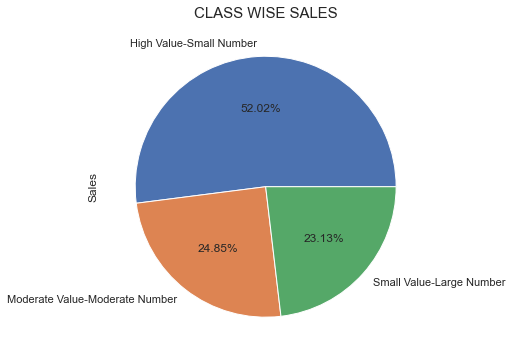

In [139]:
t_data.plot(kind='pie',subplots=True,legend=False,autopct='%.2f%%',figsize=(10,6))
plt.title('CLASS WISE SALES', fontsize=15)
plt.show()

### 6. REGION WISE SALES .

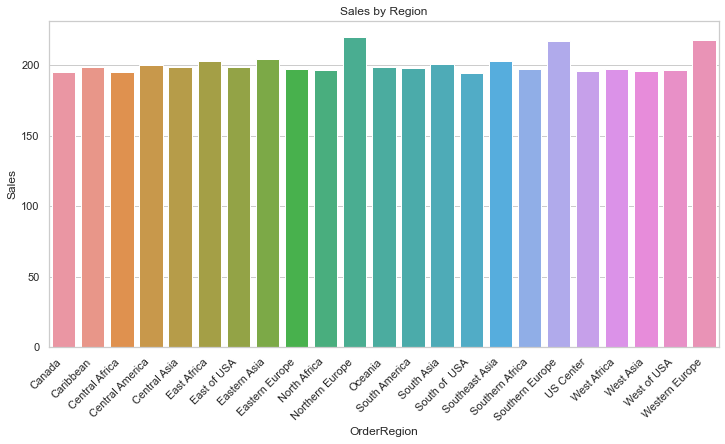

In [140]:
plt.figure(figsize=(12,6))
sns.barplot(data=data3,x=data3.index,y=data3['Sales'])
plt.xticks(rotation=45, ha='right')
plt.title("Sales by Region")
plt.show()

## E. Predictive modeling & perform the tasks as per your understanding

In [141]:
# Aggregation at Customer Level
customer_data = sales_inventory.groupby('CustomerId').agg({
    'CustomerSegment': 'first',
    'CustomerCountry': 'first',
    'OrderItemQuantity': 'sum',
    'OrderItemTotal': 'sum',
    'ProductCategoryId': 'first',
    'OrderItemProductPrice': 'first',
    'ProductPrice': 'first',
    'Class': 'first',
    'Sales': 'sum'
}).reset_index()

print('There are',len(sales_inventory.CustomerId.unique()),'unique customers in our data base')
print('The newly created Customer table has',customer_data.shape[0],'rows corresponding to each unique customer id')

There are 20652 unique customers in our data base
The newly created Customer table has 20652 rows corresponding to each unique customer id


In [142]:
# Create a new DataFrame with selected columns

linear_regression = customer_data.copy()
linear_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             20652 non-null  int64  
 1   CustomerSegment        20652 non-null  object 
 2   CustomerCountry        20652 non-null  object 
 3   OrderItemQuantity      20652 non-null  int64  
 4   OrderItemTotal         20652 non-null  float64
 5   ProductCategoryId      20652 non-null  int64  
 6   OrderItemProductPrice  20652 non-null  float64
 7   ProductPrice           20652 non-null  float64
 8   Class                  20652 non-null  object 
 9   Sales                  20652 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 1.6+ MB


In [143]:
# seperating the categorical columns from the numerical ones
numerical_data = linear_regression.select_dtypes(include=['number'])
categorical_data = linear_regression.select_dtypes(include=['object'])

In [144]:
# Extracting the feature/column names 

numeric_features = numerical_data.columns
categorical_features = categorical_data.columns

In [145]:
linear_regression.head()

CustomerId CustomerSegment CustomerCountry  OrderItemQuantity  \
0           1        Consumer         EE. UU.                  5   
1           2        Consumer         EE. UU.                 19   
2           3        Consumer     Puerto Rico                 33   
3           4        Consumer         EE. UU.                 34   
4           5     Home Office     Puerto Rico                 18   

   OrderItemTotal  ProductCategoryId  OrderItemProductPrice  ProductPrice  \
0      472.450012                  9              99.989998     99.989998   
1     1618.660042                 45             399.980011    399.980011   
2     3189.200037                  9              99.989998     99.989998   
3     1480.709993                 17              59.990002     59.990002   
4     1101.919998                 17              59.990002     59.990002   

                     Class        Sales  
0  High Value-Small Number   499.950012  
1  High Value-Small Number  1819.730034  
2  High Value-Small Number  3537.680094  
3  High Value-Small Number  1719.630030  
4  High Value-Small Number  1274.750023

In [146]:
print(numeric_features)
print()
print(categorical_features)

Index(['CustomerId', 'OrderItemQuantity', 'OrderItemTotal',
       'ProductCategoryId', 'OrderItemProductPrice', 'ProductPrice', 'Sales'],
      dtype='object')

Index(['CustomerSegment', 'CustomerCountry', 'Class'], dtype='object')


In [147]:
#Creating dummy variables for the categorical data
categorical_data_dummy = pd.get_dummies(categorical_data, drop_first = True )
categorical_data_dummy

CustomerSegment_Corporate  CustomerSegment_Home Office  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            1   
...                          ...                          ...   
20647                          0                            0   
20648                          0                            0   
20649                          0                            0   
20650                          1                            0   
20651                          1                            0   

       CustomerCountry_Puerto Rico  Class_Moderate Value-Moderate Number  \
0                                0                                     0   
1                                0                                     0   
2                                1                                     0   
3                                0                                     0   
4                                1                                     0   
...                            ...                                   ...   
20647                            1                                     0   
20648                            0                                     0   
20649                            1                                     0   
20650                            0                                     0   
20651                            0                                     0   

       Class_Small Value-Large Number  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  
...                               ...  
20647                               1  
20648                               1  
20649                               1  
20650                               1  
20651                               1  

[20652 rows x 5 columns]

In [148]:
# combine categorical and numerical datasets 
linear_regression_new = pd.concat([categorical_data_dummy,numerical_data], axis = 1 )
linear_regression_new

CustomerSegment_Corporate  CustomerSegment_Home Office  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            1   
...                          ...                          ...   
20647                          0                            0   
20648                          0                            0   
20649                          0                            0   
20650                          1                            0   
20651                          1                            0   

       CustomerCountry_Puerto Rico  Class_Moderate Value-Moderate Number  \
0                                0                                     0   
1                                0                                     0   
2                                1                                     0   
3                                0                                     0   
4                                1                                     0   
...                            ...                                   ...   
20647                            1                                     0   
20648                            0                                     0   
20649                            1                                     0   
20650                            0                                     0   
20651                            0                                     0   

       Class_Small Value-Large Number  CustomerId  OrderItemQuantity  \
0                                   0           1                  5   
1                                   0           2                 19   
2                                   0           3                 33   
3                                   0           4                 34   
4                                   0           5                 18   
...                               ...         ...                ...   
20647                               1       20753                  1   
20648                               1       20754                  1   
20649                               1       20755                  1   
20650                               1       20756                  1   
20651                               1       20757                  1   

       OrderItemTotal  ProductCategoryId  OrderItemProductPrice  ProductPrice  \
0          472.450012                  9              99.989998     99.989998   
1         1618.660042                 45             399.980011    399.980011   
2         3189.200037                  9              99.989998     99.989998   
3         1480.709993                 17              59.990002     59.990002   
4         1101.919998                 17              59.990002     59.990002   
...               ...                ...                    ...           ...   
20647      161.869995                 76             215.820007    215.820007   
20648      172.660004                 76             215.820007    215.820007   
20649      314.640015                 73             327.750000    327.750000   
20650       10.910000                 74              11.540000     11.540000   
20651       34.980000                 75              39.750000     39.750000   

             Sales  
0       499.950012  
1      1819.730034  
2      3537.680094  
3      1719.630030  
4      1274.750023  
...            ...  
20647   215.820007  
20648   215.820007  
20649   327.750000  
20650    11.540000  
20651    39.750000  

[20652 rows x 12 columns]

In [149]:
linear_regression_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CustomerSegment_Corporate             20652 non-null  uint8  
 1   CustomerSegment_Home Office           20652 non-null  uint8  
 2   CustomerCountry_Puerto Rico           20652 non-null  uint8  
 3   Class_Moderate Value-Moderate Number  20652 non-null  uint8  
 4   Class_Small Value-Large Number        20652 non-null  uint8  
 5   CustomerId                            20652 non-null  int64  
 6   OrderItemQuantity                     20652 non-null  int64  
 7   OrderItemTotal                        20652 non-null  float64
 8   ProductCategoryId                     20652 non-null  int64  
 9   OrderItemProductPrice                 20652 non-null  float64
 10  ProductPrice                          20652 non-null  float64
 11  Sales          

In [150]:
linear_regression_new.columns = linear_regression_new.columns.str.replace(' ','_')
linear_regression_new.columns = linear_regression_new.columns.str.replace('-','_')
linear_regression_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20652 entries, 0 to 20651
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CustomerSegment_Corporate             20652 non-null  uint8  
 1   CustomerSegment_Home_Office           20652 non-null  uint8  
 2   CustomerCountry_Puerto_Rico           20652 non-null  uint8  
 3   Class_Moderate_Value_Moderate_Number  20652 non-null  uint8  
 4   Class_Small_Value_Large_Number        20652 non-null  uint8  
 5   CustomerId                            20652 non-null  int64  
 6   OrderItemQuantity                     20652 non-null  int64  
 7   OrderItemTotal                        20652 non-null  float64
 8   ProductCategoryId                     20652 non-null  int64  
 9   OrderItemProductPrice                 20652 non-null  float64
 10  ProductPrice                          20652 non-null  float64
 11  Sales          

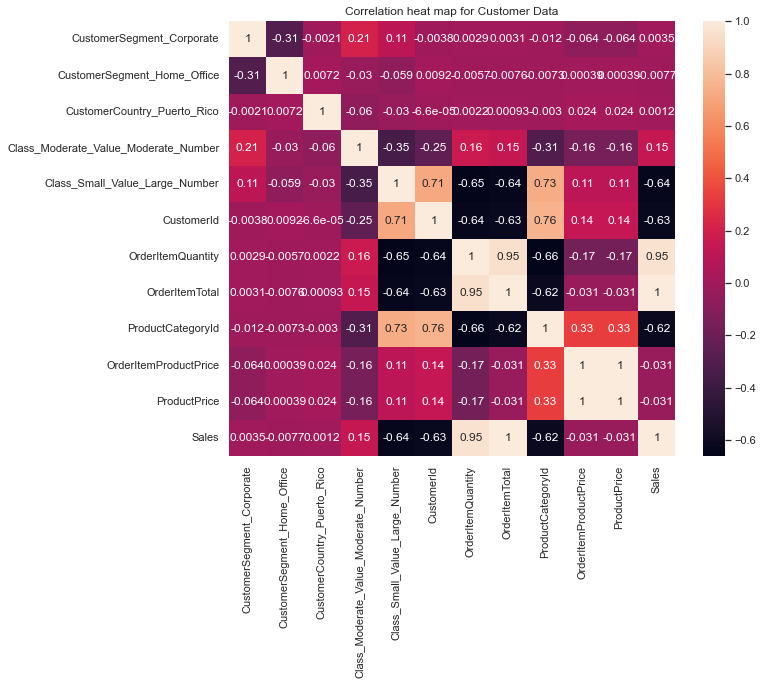

In [151]:
# CHecking the correlation of independent features X with dependent variable y

plt.figure(figsize=(10,8))
fig = sns.heatmap(linear_regression_new.corr(),annot=True)
fig.set_title('Correlation heat map for Customer Data')
plt.show()

<Axes: >

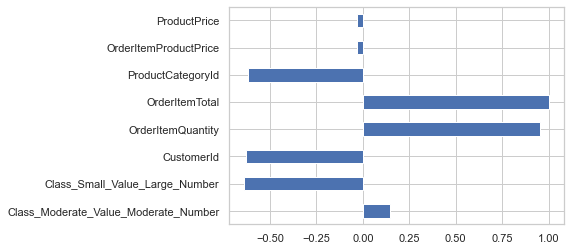

In [152]:
linear_regression_new.corr()['Sales'].iloc[3:-1].plot(kind='barh')

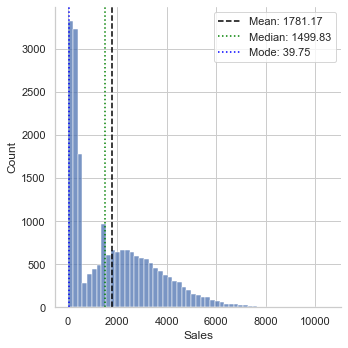

In [153]:
#Checking the Normality on Y
sns.displot(linear_regression_new.Sales)

# Calculate the mean, median, and mode
mean = linear_regression_new.Sales.mean()
median = linear_regression_new.Sales.median()
mode = linear_regression_new.Sales.mode()[0]

# Annotate the plot with the mean, median, and mode
plt.axvline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle=':', label=f'Mode: {mode:.2f}')

# Add labels and title
plt.xlabel('Sales')
plt.legend()

# Show the plot
plt.show()

In [154]:
linear_regression_new.Sales.kurtosis()

0.19838540216572698

In [155]:
#It seems, our target variable is negatively skewed
#Bring it to Normality (Normal Distribution)

#Log Transformation

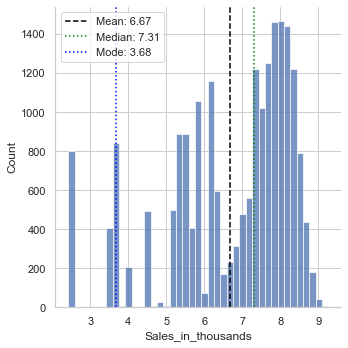

In [156]:
sns.displot(np.log(linear_regression_new.Sales))

mean = np.log(linear_regression_new.Sales).mean()
median = np.log(linear_regression_new.Sales).median()
mode = np.log(linear_regression_new.Sales).mode()[0]

plt.axvline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle=':', label=f'Median: {median:.2f}')
plt.axvline(mode, color='blue', linestyle=':', label=f'Mode: {mode:.2f}')

plt.xlabel('Sales_in_thousands')
plt.legend()

plt.show()

In [157]:
np.log(linear_regression_new.Sales).kurtosis()

0.035725507405911294

In [158]:
#kurtosis is close to '0' now our target variable seems to be normally distributed

In [159]:
linear_regression_new['log_Sales']=np.log(linear_regression_new.Sales)
linear_regression_new

CustomerSegment_Corporate  CustomerSegment_Home_Office  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            1   
...                          ...                          ...   
20647                          0                            0   
20648                          0                            0   
20649                          0                            0   
20650                          1                            0   
20651                          1                            0   

       CustomerCountry_Puerto_Rico  Class_Moderate_Value_Moderate_Number  \
0                                0                                     0   
1                                0                                     0   
2                                1                                     0   
3                                0                                     0   
4                                1                                     0   
...                            ...                                   ...   
20647                            1                                     0   
20648                            0                                     0   
20649                            1                                     0   
20650                            0                                     0   
20651                            0                                     0   

       Class_Small_Value_Large_Number  CustomerId  OrderItemQuantity  \
0                                   0           1                  5   
1                                   0           2                 19   
2                                   0           3                 33   
3                                   0           4                 34   
4                                   0           5                 18   
...                               ...         ...                ...   
20647                               1       20753                  1   
20648                               1       20754                  1   
20649                               1       20755                  1   
20650                               1       20756                  1   
20651                               1       20757                  1   

       OrderItemTotal  ProductCategoryId  OrderItemProductPrice  ProductPrice  \
0          472.450012                  9              99.989998     99.989998   
1         1618.660042                 45             399.980011    399.980011   
2         3189.200037                  9              99.989998     99.989998   
3         1480.709993                 17              59.990002     59.990002   
4         1101.919998                 17              59.990002     59.990002   
...               ...                ...                    ...           ...   
20647      161.869995                 76             215.820007    215.820007   
20648      172.660004                 76             215.820007    215.820007   
20649      314.640015                 73             327.750000    327.750000   
20650       10.910000                 74              11.540000     11.540000   
20651       34.980000                 75              39.750000     39.750000   

             Sales  log_Sales  
0       499.950012   6.214508  
1      1819.730034   7.506443  
2      3537.680094   8.171226  
3      1719.630030   7.449864  
4      1274.750023   7.150505  
...            ...        ...  
20647   215.820007   5.374445  
20648   215.820007   5.374445  
20649   327.750000   5.792251  
20650    11.540000   2.445819  
20651    39.750000   3.682610  

[20652 rows x 13 columns]

In [160]:
#Divide the dataset into Train-Test

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# this is the methodl, which will be used for the input to smf 
# random_state = 1, is to avoid shuffling of the train-test data after re-run, can be set to any number
train, test = train_test_split(linear_regression_new, test_size = 0.25, random_state = 1)

In [163]:
print('Original data:',linear_regression_new.shape)
print("---")
print('train data:',train.shape,'| ','test data',test.shape)

Original data: (20652, 13)
---
train data: (15489, 13) |  test data (5163, 13)


In [164]:
# submitting the x & y variable required for the formula of the algorithm
X = linear_regression_new.columns.difference(['Sales','log_Sales'])  
y = linear_regression_new['log_Sales']

In [165]:
# define the model equation 
linear_regression_formula = 'log_Sales ~' + ' + '.join( X )
linear_regression_formula

'log_Sales ~Class_Moderate_Value_Moderate_Number + Class_Small_Value_Large_Number + CustomerCountry_Puerto_Rico + CustomerId + CustomerSegment_Corporate + CustomerSegment_Home_Office + OrderItemProductPrice + OrderItemQuantity + OrderItemTotal + ProductCategoryId + ProductPrice'

In [166]:
# fit the model or model initialization step 
linear_model = smf.ols(linear_regression_formula, train).fit()
linear_model

In [167]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Sales   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     8653.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        01:22:57   Log-Likelihood:                -15062.
No. Observations:               15489   AIC:                         3.015e+04
Df Residuals:                   15478   BIC:                         3.023e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [168]:
#model. predict(train) -- in log format
# using np.exp to bring it back to basic units
np.exp(linear_model.predict(train))

19739       58.944757
2653      4741.523158
3078      3567.941480
3655       549.125681
4974       759.330443
             ...     
10955     1558.496759
17289      106.354960
5192      4939.720959
12172      847.891628
235      14748.846267
Length: 15489, dtype: float64

In [169]:
train.Sales

19739      39.750000
2653     4239.530086
3078     3748.590092
3655      439.960007
4974     1089.890022
            ...     
10955    1669.690014
17289     215.820007
5192     4429.550076
12172    2517.620052
235      5756.340094
Name: Sales, Length: 15489, dtype: float64

In [170]:
# MSE - Mean squared Error 
mse_train = mean_squared_error( train.Sales, np.exp(linear_model.predict(train)) ) 
mse_test = mean_squared_error( test.Sales, np.exp(linear_model.predict (test)) ) 
print ( ' MSE Error :','\n', 'Train:',mse_train,'|| Test:', mse_test) 
print ( ' RMSE Error : ','\n','Train:', np.sqrt(mse_train),'|| Test : ', np.sqrt(mse_test))

 MSE Error : 
 Train: 5276215.450284434 || Test: 4576184.287102873
 RMSE Error :  
 Train: 2297.0014040667093 || Test :  2139.2017873737095


In [171]:
linear_regression_new['Predicated_Sales'] = pd.concat([np.exp(linear_model.predict(train)), 
                                                     np.exp(linear_model.predict(test))]).sort_index()
linear_regression_new

CustomerSegment_Corporate  CustomerSegment_Home_Office  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            1   
...                          ...                          ...   
20647                          0                            0   
20648                          0                            0   
20649                          0                            0   
20650                          1                            0   
20651                          1                            0   

       CustomerCountry_Puerto_Rico  Class_Moderate_Value_Moderate_Number  \
0                                0                                     0   
1                                0                                     0   
2                                1                                     0   
3                                0                                     0   
4                                1                                     0   
...                            ...                                   ...   
20647                            1                                     0   
20648                            0                                     0   
20649                            1                                     0   
20650                            0                                     0   
20651                            0                                     0   

       Class_Small_Value_Large_Number  CustomerId  OrderItemQuantity  \
0                                   0           1                  5   
1                                   0           2                 19   
2                                   0           3                 33   
3                                   0           4                 34   
4                                   0           5                 18   
...                               ...         ...                ...   
20647                               1       20753                  1   
20648                               1       20754                  1   
20649                               1       20755                  1   
20650                               1       20756                  1   
20651                               1       20757                  1   

       OrderItemTotal  ProductCategoryId  OrderItemProductPrice  ProductPrice  \
0          472.450012                  9              99.989998     99.989998   
1         1618.660042                 45             399.980011    399.980011   
2         3189.200037                  9              99.989998     99.989998   
3         1480.709993                 17              59.990002     59.990002   
4         1101.919998                 17              59.990002     59.990002   
...               ...                ...                    ...           ...   
20647      161.869995                 76             215.820007    215.820007   
20648      172.660004                 76             215.820007    215.820007   
20649      314.640015                 73             327.750000    327.750000   
20650       10.910000                 74              11.540000     11.540000   
20651       34.980000                 75              39.750000     39.750000   

             Sales  log_Sales  Predicated_Sales  
0       499.950012   6.214508       1393.372664  
1      1819.730034   7.506443       1967.824605  
2      3537.680094   8.171226       5446.218945  
3      1719.630030   7.449864       1973.006807  
4      1274.750023   7.150505       1385.441803  
...            ...        ...               ...  
20647   215.820007   5.374445         90.209008  
20648   215.820007   5.374445         94.340017  
20649   327.750000   5.79

In [172]:
linear_regression_new.to_pickle('/Users/adityabisht/Downloads/linear_model_output.pkl')